Student Name: Chelliah Kanthanathan
Student ID: 18263003

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

# Task 1 - Load the data set

In [13]:
df = pd.read_csv('./bank_et1.csv')

# Print the first five rows
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [14]:
# Print the last five rows
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


# Task 1 - Identify an attribute that can be the target/dependable variable for 2-class classification.

In [15]:
# column loan could be the target/dependable variable. I assume the column show if the account has an existing loan or not.
# The loan column represents yes (loan exists) or no (no loan) that can be used for 2 class classification

# Task 2 - Calculate statistics for the numerical and categorical attributes.

In [16]:
# Print statistical summary for all numerical attributes
df.describe()

,Unnamed: 0,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,577.494589,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,0.000000,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,499.750000,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,999.500000,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,1499.250000,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,1999.000000,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [42]:
# check if there is any missing values for categorical attributes
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [43]:
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

In [44]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [45]:
df['default'].value_counts()

no     1985
yes      15
Name: default, dtype: int64

In [46]:
df['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

In [47]:
df['loan'].value_counts()

no     1750
yes     250
Name: loan, dtype: int64

In [48]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [49]:
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [50]:
df['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

# Task 2 - Use at least two different plotting techniques to plot the distribution of two numerical and two categorical attributes. Draw short conclusions (in a markdown cell).

Two numerical attributes selected - age and balance

Text(0,0.5,'frequency')

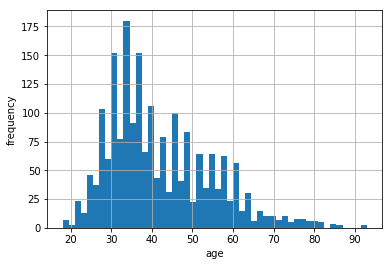

In [18]:
# Plotting a histogram of age to check the distribution of age for 2000 bank accounts
df['age'].hist(bins=50)
plt.xlabel('age')
plt.ylabel('frequency')

age between 30 to 40 has high frequency. Above age 60 and below age 22 have less frequency. This concludes the majority of accounts have age range between 30 to 40 followed by 40 to 60

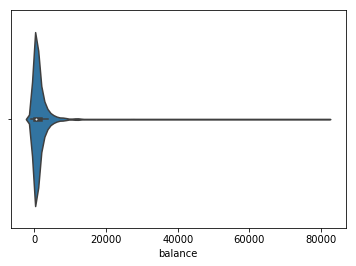

In [19]:
# Plotting Violinplot for balance to check the distribution of balance for 2000 bank accounts
sns.violinplot(x=df['balance'])

above violin plot concludes that most of the accounts have balance above 1000

Two categorical attributes selected - loan and education

Text(0,0.5,'Number of Accounts with loan')

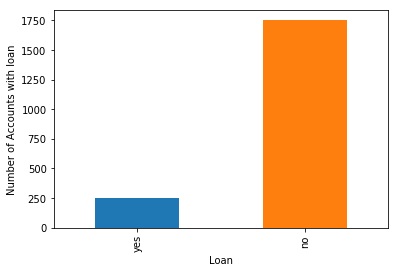

In [20]:
# Plotting bar chart for loan. Plot the accounts with or without loan
frequency_table = df['loan'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('Loan')
plt.ylabel('Number of Accounts with loan')

above bar chart concludes the accounts with loan is 250 and without loan is 1750

Text(0,0.5,'Number of Accounts')

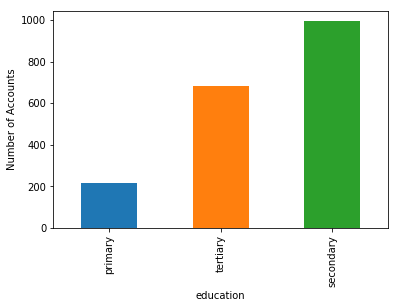

In [21]:
# Plotting bar chart for education.
frequency_table = df['education'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('education')
plt.ylabel('Number of Accounts')

above bar chart concludes most of the accounts have secondary education followed by tertiary education. But only 200 accounts have primary education

# Task 2 - Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).

Text(0,0.5,'Number of Accounts')

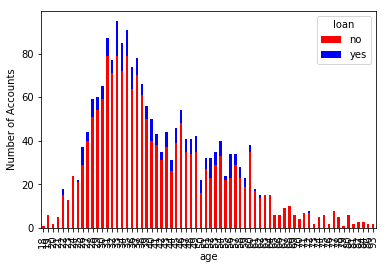

In [22]:
# stacked bar chart for age and loan grouped together to understand the age range that has an existing loan
stacked_chart = pd.crosstab(df['age'], df['loan'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Accounts')

above stacked bar chart concludes that mostly the age range between 30 to 60 has an existing loan

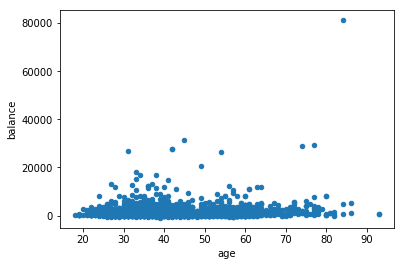

In [23]:
# Examine the relationship between age and balance with a scatter plot.
df.plot.scatter(x='age', y='balance')

above scatter plot concludes that some age range between 80 to 85 has highest balance. At the same time few accounts with in the age range between 30 to 80 has balance between 25000 to 30000. Also another key thing is that any other age group less than 30 or greater than 80 have balance less than 20000.

# Task 2 - Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1.

we could use the numerical attributes columns age and balance to understand the likelihood of existing loan i.e with less balance the account would likely to have an existing loan. Also the columns age and balance could have some dependency i.e. with young age the balance could be less and old age the balance could be more as less age obviously would have had the accounts in service for only for few years than old age. So age and balance could have some dependency.

In [24]:
# Column loan is a categorical attribute with two categories:

# Yes - the account has an existing loan
# No - the account with out an existing loan
# Let's look at the chances of existing a loan based on age and balance. So we will examine the relation between atributes age, balance and loan.

In [25]:
frequency_table = df['loan'].value_counts(ascending=True)
print('Frequency Table for loan') 
print(frequency_table)

Frequency Table for loan
yes     250
no     1750
Name: loan, dtype: int64


Text(0,0.5,'Number of Accounts')

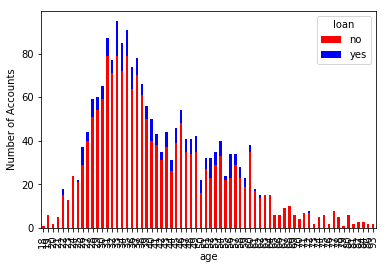

In [26]:
# stacked bar chart for age and loan grouped together to understand the age range that has an existing loan
stacked_chart = pd.crosstab(df['age'], df['loan'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Accounts')

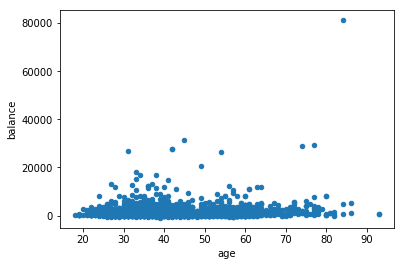

In [27]:
# Examine the relationship between age and balance with a scatter plot.
df.plot.scatter(x='age', y='balance')

above stacked bar chart concludes that mostly the age range between 30 to 60 has an existing loan

above scatter plot concludes that some age range between 80 to 85 has highest balance. At the same time few accounts with in the age range between 30 to 80 has balance between 25000 to 30000. Also another key thing is that any other age group less than 30 or greater than 80 have balance less than 20000.

# Thus we could conclude that the account with age range between 30 and 60 and with balance between 25000 to 30000 has likely chance to apply for loan.

Suggestion: try PLA on this dataset before using the bank dataset

# Task 3

Perceptron model in simple takes 1 or more inputs and aggregates it with weight and return 0 if the sum is above threshold or else returns 1 if the sum is less than threshold. 

The PLA in simple includes below main steps,
1. Initialize weight small random numbers and then Compute linear combination of inputs to get the predicted output
2.Update the weights
3.Note down the errors i.e. difference between actual and expected predicted outputs
4.If the error is not 0 after training then repeat above steps from Step 2 until the error converge to 0

Once we find that there is a pattern that exists between input data (INPUT SPACE) and outputs (OUTPUT SPACE) from EDA then the learning could starts as below,
1.Identify an unknown functions which ideally maps the input space to the output space. In another term this function helps to predict the target variable, So this is called Unknown Target Function
2.Identify set of unknown Target Functions which is called Hypothesis Set
3.Implement the learning algorithm that pick the optimal function from the hypothesis set based on the Data Set
4.After few iterations of updating weight and training example multiple times then the final optimal function is found with which the error converge to zero. This final optimal function is called Final Hypothesis

During training the same data that used to predict the output is used again on the final hypothesis for prediction then the error rate that we get during testing is called in sample error. At the same time if the different data than the one used for training is used on the final hypothesis for prediction then the error rate that we get during testing is called out of sample error.

# Task 4 Run the provided perceptron learning algorithm (PLA) 

In [155]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 

In [156]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [157]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [158]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights,x_min), point_on_boundary(weights,x_max)]

In [159]:
def pla(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    while True:
        print("No of Iterations:",iterations)
        errors = 0
        iterations+=1
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                weights = weights + y*(np.concatenate((bias,x)))
                print("Weights: ",weights, "& Errors:", errors)
                errors+=1;
        if (errors == 0):
            print("Final Hypothesis Found after ",iterations, " iterations")
            break
    return weights, iterations

In [160]:
def pla_with_pocket_algorithm(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    
    good_err = calc_error(training_in, training_out, weights)
    good_weights = weights
    good_weights_iterations = iterations
    while iterations < 10:
        print("No of Iterations:",iterations)
        errors = 0
        iterations+=1
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                
                err = calc_error(training_in, training_out, weights)
                if (err < good_err):
                    good_err = err
                    good_weights = weights
                    good_weights_iterations = iterations
                    
                weights = weights + y*(np.concatenate((bias,x)))
                print("Weights: ",weights, "& Errors:", errors)
                errors+=1;
        if (errors == 0):
            print("Final Hypothesis Found after ",iterations, " iterations")
            break
            
    print("Good Weights: ",good_weights, " Found at iteration:", good_weights_iterations)
    return weights, iterations

In [161]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

# PLA on make_blobs dataset

In [162]:
list_of_weights = [0.2,0.6,1]
array_of_weights = np.array(list_of_weights)
pla(X,y,array_of_weights)

No of Iterations: 0
Weights:  [ 1.2        -6.42682662 -6.66523031] & Errors: 0
No of Iterations: 1
Final Hypothesis Found after  2  iterations


(array([ 1.2       , -6.42682662, -6.66523031]), 2)

# PLA with pocket algorithm on make_blob data set

In [163]:
list_of_weights = [0.2,0.6,1]
array_of_weights = np.array(list_of_weights)
pla_with_pocket_algorithm(X,y,array_of_weights)

No of Iterations: 0
Weights:  [ 1.2        -6.42682662 -6.66523031] & Errors: 0
No of Iterations: 1
Final Hypothesis Found after  2  iterations
Good Weights:  [0.2 0.6 1. ]  Found at iteration: 0


(array([ 1.2       , -6.42682662, -6.66523031]), 2)

# PLA on Bank dataset

In [164]:
XX = df[['age', 'balance']].values
print(XX)

[[  32  392]
 [  39  688]
 [  59 1035]
 ...
 [  81 1154]
 [  46 4343]
 [  40 6403]]


In [165]:
yyy = df['loan'].map({'yes': 1, 'no': 0})
print(yyy)

0       0
1       1
2       1
3       1
4       0
5       0
6       1
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    1
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
Name: loan, Length: 2000, dtype: int64


In [166]:
list_of_weights = [1,1,1]
array_of_weights = np.array(list_of_weights)
#pla(XX,yyy,array_of_weights)

PLA results were unsatisfactory it does not converge to 0

# PLA with pocket algorithm on banking data

In [ ]:
list_of_random_weights = [0,0,0]
array_of_random_weights = np.array(list_of_random_weights)
pla_with_pocket_algorithm(XX,yyy,array_of_random_weights)

No of Iterations: 0
Weights:  [  1  39 688] & Errors: 0
Weights:  [  1  39 688] & Errors: 1
Weights:  [  1  39 688] & Errors: 2
Weights:  [  1  39 688] & Errors: 3
Weights:  [  1  39 688] & Errors: 4
Weights:  [  1  39 688] & Errors: 5
Weights:  [  1  39 688] & Errors: 6
Weights:  [  1  39 688] & Errors: 7
Weights:  [  1  39 688] & Errors: 8
Weights:  [  1  39 688] & Errors: 9
Weights:  [  1  39 688] & Errors: 10
Weights:  [  2  85 658] & Errors: 11
Weights:  [  2  85 658] & Errors: 12
Weights:  [  2  85 658] & Errors: 13
Weights:  [  2  85 658] & Errors: 14
Weights:  [  2  85 658] & Errors: 15
Weights:  [  2  85 658] & Errors: 16
Weights:  [  2  85 658] & Errors: 17
Weights:  [  2  85 658] & Errors: 18
Weights:  [  2  85 658] & Errors: 19
Weights:  [  2  85 658] & Errors: 20
Weights:  [  2  85 658] & Errors: 21
Weights:  [  2  85 658] & Errors: 22
Weights:  [  2  85 658] & Errors: 23
Weights:  [  2  85 658] & Errors: 24
Weights:  [  2  85 658] & Errors: 25
Weights:  [  2  85 658] & Er

Weights:  [   5  192 -235] & Errors: 222
Weights:  [   5  192 -235] & Errors: 223
Weights:  [   6  248 2131] & Errors: 224
Weights:  [   6  248 2131] & Errors: 225
Weights:  [   6  248 2131] & Errors: 226
Weights:  [   6  248 2131] & Errors: 227
Weights:  [   6  248 2131] & Errors: 228
Weights:  [   7  301 1920] & Errors: 229
Weights:  [   7  301 1920] & Errors: 230
Weights:  [   7  301 1920] & Errors: 231
Weights:  [   7  301 1920] & Errors: 232
Weights:  [   7  301 1920] & Errors: 233
Weights:  [   7  301 1920] & Errors: 234
Weights:  [   7  301 1920] & Errors: 235
Weights:  [   7  301 1920] & Errors: 236
Weights:  [   7  301 1920] & Errors: 237
Weights:  [   7  301 1920] & Errors: 238
Weights:  [   7  301 1920] & Errors: 239
Weights:  [   7  301 1920] & Errors: 240
Weights:  [   7  301 1920] & Errors: 241
Weights:  [   7  301 1920] & Errors: 242
Weights:  [   7  301 1920] & Errors: 243
Weights:  [   7  301 1920] & Errors: 244
Weights:  [   7  301 1920] & Errors: 245
Weights:  [   7 

Weights:  [ 14 611 -22] & Errors: 430
Weights:  [ 14 611 -22] & Errors: 431
Weights:  [ 14 611 -22] & Errors: 432
Weights:  [ 14 611 -22] & Errors: 433
Weights:  [ 14 611 -22] & Errors: 434
Weights:  [ 14 611 -22] & Errors: 435
Weights:  [ 14 611 -22] & Errors: 436
Weights:  [ 14 611 -22] & Errors: 437
Weights:  [ 14 611 -22] & Errors: 438
Weights:  [ 14 611 -22] & Errors: 439
Weights:  [ 14 611 -22] & Errors: 440
Weights:  [  15  655 3441] & Errors: 441
Weights:  [  15  655 3441] & Errors: 442
Weights:  [  15  655 3441] & Errors: 443
Weights:  [  15  655 3441] & Errors: 444
Weights:  [  15  655 3441] & Errors: 445
Weights:  [  15  655 3441] & Errors: 446
Weights:  [  15  655 3441] & Errors: 447
Weights:  [  15  655 3441] & Errors: 448
Weights:  [  15  655 3441] & Errors: 449
Weights:  [  15  655 3441] & Errors: 450
Weights:  [  15  655 3441] & Errors: 451
Weights:  [  15  655 3441] & Errors: 452
Weights:  [  16  705 3371] & Errors: 453
Weights:  [  16  705 3371] & Errors: 454
Weights:

Weights:  [  25 1052  226] & Errors: 633
Weights:  [  25 1052  226] & Errors: 634
Weights:  [  25 1052  226] & Errors: 635
Weights:  [  25 1052  226] & Errors: 636
Weights:  [  25 1052  226] & Errors: 637
Weights:  [  25 1052  226] & Errors: 638
Weights:  [  25 1052  226] & Errors: 639
Weights:  [  25 1052  226] & Errors: 640
Weights:  [  25 1052  226] & Errors: 641
Weights:  [  25 1052  226] & Errors: 642
Weights:  [  25 1052  226] & Errors: 643
Weights:  [  25 1052  226] & Errors: 644
Weights:  [  25 1052  226] & Errors: 645
Weights:  [  25 1052  226] & Errors: 646
Weights:  [  25 1052  226] & Errors: 647
Weights:  [  25 1052  226] & Errors: 648
Weights:  [  25 1052  226] & Errors: 649
Weights:  [  25 1052  226] & Errors: 650
Weights:  [  25 1052  226] & Errors: 651
Weights:  [  25 1052  226] & Errors: 652
Weights:  [  25 1052  226] & Errors: 653
Weights:  [  25 1052  226] & Errors: 654
Weights:  [  25 1052  226] & Errors: 655
Weights:  [  25 1052  226] & Errors: 656
Weights:  [  25 

Weights:  [  25 1052  226] & Errors: 834
Weights:  [  25 1052  226] & Errors: 835
Weights:  [  25 1052  226] & Errors: 836
Weights:  [  25 1052  226] & Errors: 837
Weights:  [  25 1052  226] & Errors: 838
Weights:  [  25 1052  226] & Errors: 839
Weights:  [  25 1052  226] & Errors: 840
Weights:  [  25 1052  226] & Errors: 841
Weights:  [  25 1052  226] & Errors: 842
Weights:  [  25 1052  226] & Errors: 843
Weights:  [  25 1052  226] & Errors: 844
Weights:  [  25 1052  226] & Errors: 845
Weights:  [  25 1052  226] & Errors: 846
Weights:  [  25 1052  226] & Errors: 847
Weights:  [  25 1052  226] & Errors: 848
Weights:  [  25 1052  226] & Errors: 849
Weights:  [  25 1052  226] & Errors: 850
Weights:  [  25 1052  226] & Errors: 851
Weights:  [  25 1052  226] & Errors: 852
Weights:  [  25 1052  226] & Errors: 853
Weights:  [  25 1052  226] & Errors: 854
Weights:  [  25 1052  226] & Errors: 855
Weights:  [  25 1052  226] & Errors: 856
Weights:  [  25 1052  226] & Errors: 857
Weights:  [  25 

Weights:  [  25 1052  226] & Errors: 1036
Weights:  [  25 1052  226] & Errors: 1037
Weights:  [  25 1052  226] & Errors: 1038
Weights:  [  25 1052  226] & Errors: 1039
Weights:  [  25 1052  226] & Errors: 1040
Weights:  [  25 1052  226] & Errors: 1041
Weights:  [  25 1052  226] & Errors: 1042
Weights:  [  25 1052  226] & Errors: 1043
Weights:  [  25 1052  226] & Errors: 1044
Weights:  [  25 1052  226] & Errors: 1045
Weights:  [  25 1052  226] & Errors: 1046
Weights:  [  25 1052  226] & Errors: 1047
Weights:  [  25 1052  226] & Errors: 1048
Weights:  [  25 1052  226] & Errors: 1049
Weights:  [  25 1052  226] & Errors: 1050
Weights:  [  25 1052  226] & Errors: 1051
Weights:  [  25 1052  226] & Errors: 1052
Weights:  [  25 1052  226] & Errors: 1053
Weights:  [  25 1052  226] & Errors: 1054
Weights:  [  25 1052  226] & Errors: 1055
Weights:  [  25 1052  226] & Errors: 1056
Weights:  [  25 1052  226] & Errors: 1057
Weights:  [  25 1052  226] & Errors: 1058
Weights:  [  25 1052  226] & Error

Weights:  [  25 1052  226] & Errors: 1234
Weights:  [  25 1052  226] & Errors: 1235
Weights:  [  25 1052  226] & Errors: 1236
Weights:  [  25 1052  226] & Errors: 1237
Weights:  [  25 1052  226] & Errors: 1238
Weights:  [  25 1052  226] & Errors: 1239
Weights:  [  25 1052  226] & Errors: 1240
Weights:  [  25 1052  226] & Errors: 1241
Weights:  [  25 1052  226] & Errors: 1242
Weights:  [  25 1052  226] & Errors: 1243
Weights:  [  25 1052  226] & Errors: 1244
Weights:  [  25 1052  226] & Errors: 1245
Weights:  [  25 1052  226] & Errors: 1246
Weights:  [  25 1052  226] & Errors: 1247
Weights:  [  25 1052  226] & Errors: 1248
Weights:  [  25 1052  226] & Errors: 1249
Weights:  [  25 1052  226] & Errors: 1250
Weights:  [  25 1052  226] & Errors: 1251
Weights:  [  25 1052  226] & Errors: 1252
Weights:  [  25 1052  226] & Errors: 1253
Weights:  [  25 1052  226] & Errors: 1254
Weights:  [  25 1052  226] & Errors: 1255
Weights:  [  25 1052  226] & Errors: 1256
Weights:  [  25 1052  226] & Error

Weights:  [  25 1052  226] & Errors: 1435
Weights:  [  25 1052  226] & Errors: 1436
Weights:  [  25 1052  226] & Errors: 1437
Weights:  [  25 1052  226] & Errors: 1438
Weights:  [  25 1052  226] & Errors: 1439
Weights:  [  25 1052  226] & Errors: 1440
Weights:  [  25 1052  226] & Errors: 1441
Weights:  [  25 1052  226] & Errors: 1442
Weights:  [  25 1052  226] & Errors: 1443
Weights:  [  25 1052  226] & Errors: 1444
Weights:  [  25 1052  226] & Errors: 1445
Weights:  [  25 1052  226] & Errors: 1446
Weights:  [  25 1052  226] & Errors: 1447
Weights:  [  25 1052  226] & Errors: 1448
Weights:  [  25 1052  226] & Errors: 1449
Weights:  [  25 1052  226] & Errors: 1450
Weights:  [  25 1052  226] & Errors: 1451
Weights:  [  25 1052  226] & Errors: 1452
Weights:  [  25 1052  226] & Errors: 1453
Weights:  [  25 1052  226] & Errors: 1454
Weights:  [  25 1052  226] & Errors: 1455
Weights:  [  25 1052  226] & Errors: 1456
Weights:  [  25 1052  226] & Errors: 1457
Weights:  [  25 1052  226] & Error

Weights:  [  25 1052  226] & Errors: 1638
Weights:  [  25 1052  226] & Errors: 1639
Weights:  [  25 1052  226] & Errors: 1640
Weights:  [  25 1052  226] & Errors: 1641
Weights:  [  25 1052  226] & Errors: 1642
Weights:  [  25 1052  226] & Errors: 1643
Weights:  [  25 1052  226] & Errors: 1644
Weights:  [  25 1052  226] & Errors: 1645
Weights:  [  25 1052  226] & Errors: 1646
Weights:  [  25 1052  226] & Errors: 1647
Weights:  [  25 1052  226] & Errors: 1648
Weights:  [  25 1052  226] & Errors: 1649
Weights:  [  25 1052  226] & Errors: 1650
Weights:  [  25 1052  226] & Errors: 1651
Weights:  [  25 1052  226] & Errors: 1652
Weights:  [  25 1052  226] & Errors: 1653
Weights:  [  25 1052  226] & Errors: 1654
Weights:  [  25 1052  226] & Errors: 1655
Weights:  [  25 1052  226] & Errors: 1656
Weights:  [  25 1052  226] & Errors: 1657
Weights:  [  25 1052  226] & Errors: 1658
Weights:  [  25 1052  226] & Errors: 1659
Weights:  [  25 1052  226] & Errors: 1660
Weights:  [  25 1052  226] & Error

Weights:  [  25 1052  226] & Errors: 66
Weights:  [  25 1052  226] & Errors: 67
Weights:  [  25 1052  226] & Errors: 68
Weights:  [  25 1052  226] & Errors: 69
Weights:  [  25 1052  226] & Errors: 70
Weights:  [  25 1052  226] & Errors: 71
Weights:  [  25 1052  226] & Errors: 72
Weights:  [  25 1052  226] & Errors: 73
Weights:  [  25 1052  226] & Errors: 74
Weights:  [  25 1052  226] & Errors: 75
Weights:  [  25 1052  226] & Errors: 76
Weights:  [  25 1052  226] & Errors: 77
Weights:  [  25 1052  226] & Errors: 78
Weights:  [  25 1052  226] & Errors: 79
Weights:  [  25 1052  226] & Errors: 80
Weights:  [  25 1052  226] & Errors: 81
Weights:  [  25 1052  226] & Errors: 82
Weights:  [  25 1052  226] & Errors: 83
Weights:  [  25 1052  226] & Errors: 84
Weights:  [  25 1052  226] & Errors: 85
Weights:  [  25 1052  226] & Errors: 86
Weights:  [  25 1052  226] & Errors: 87
Weights:  [  25 1052  226] & Errors: 88
Weights:  [  25 1052  226] & Errors: 89
Weights:  [  25 1052  226] & Errors: 90


Weights:  [   31  1290 11841] & Errors: 269
Weights:  [   31  1290 11841] & Errors: 270
Weights:  [   31  1290 11841] & Errors: 271
Weights:  [   31  1290 11841] & Errors: 272
Weights:  [   31  1290 11841] & Errors: 273
Weights:  [   31  1290 11841] & Errors: 274
Weights:  [   31  1290 11841] & Errors: 275
Weights:  [   31  1290 11841] & Errors: 276
Weights:  [   31  1290 11841] & Errors: 277
Weights:  [   31  1290 11841] & Errors: 278
Weights:  [   31  1290 11841] & Errors: 279
Weights:  [   31  1290 11841] & Errors: 280
Weights:  [   31  1290 11841] & Errors: 281
Weights:  [   31  1290 11841] & Errors: 282
Weights:  [   31  1290 11841] & Errors: 283
Weights:  [   31  1290 11841] & Errors: 284
Weights:  [   31  1290 11841] & Errors: 285
Weights:  [   31  1290 11841] & Errors: 286
Weights:  [   31  1290 11841] & Errors: 287
Weights:  [   31  1290 11841] & Errors: 288
Weights:  [   31  1290 11841] & Errors: 289
Weights:  [   31  1290 11841] & Errors: 290
Weights:  [   31  1290 11841] & 

Weights:  [  39 1669 9938] & Errors: 460
Weights:  [  39 1669 9938] & Errors: 461
Weights:  [  39 1669 9938] & Errors: 462
Weights:  [  39 1669 9938] & Errors: 463
Weights:  [  40 1705 9648] & Errors: 464
Weights:  [  40 1705 9648] & Errors: 465
Weights:  [  40 1705 9648] & Errors: 466
Weights:  [  40 1705 9648] & Errors: 467
Weights:  [  40 1705 9648] & Errors: 468
Weights:  [  40 1705 9648] & Errors: 469
Weights:  [  40 1705 9648] & Errors: 470
Weights:  [  40 1705 9648] & Errors: 471
Weights:  [  40 1705 9648] & Errors: 472
Weights:  [  40 1705 9648] & Errors: 473
Weights:  [  40 1705 9648] & Errors: 474
Weights:  [  40 1705 9648] & Errors: 475
Weights:  [  40 1705 9648] & Errors: 476
Weights:  [  40 1705 9648] & Errors: 477
Weights:  [  40 1705 9648] & Errors: 478
Weights:  [  40 1705 9648] & Errors: 479
Weights:  [  40 1705 9648] & Errors: 480
Weights:  [  40 1705 9648] & Errors: 481
Weights:  [  40 1705 9648] & Errors: 482
Weights:  [  40 1705 9648] & Errors: 483
Weights:  [  40 

Weights:  [  48 2016 6793] & Errors: 660
Weights:  [  48 2016 6793] & Errors: 661
Weights:  [  48 2016 6793] & Errors: 662
Weights:  [  48 2016 6793] & Errors: 663
Weights:  [  48 2016 6793] & Errors: 664
Weights:  [  48 2016 6793] & Errors: 665
Weights:  [  48 2016 6793] & Errors: 666
Weights:  [  48 2016 6793] & Errors: 667
Weights:  [  48 2016 6793] & Errors: 668
Weights:  [  48 2016 6793] & Errors: 669
Weights:  [  48 2016 6793] & Errors: 670
Weights:  [  48 2016 6793] & Errors: 671
Weights:  [  48 2016 6793] & Errors: 672
Weights:  [  48 2016 6793] & Errors: 673
Weights:  [  48 2016 6793] & Errors: 674
Weights:  [  48 2016 6793] & Errors: 675
Weights:  [  48 2016 6793] & Errors: 676
Weights:  [  48 2016 6793] & Errors: 677
Weights:  [  48 2016 6793] & Errors: 678
Weights:  [  48 2016 6793] & Errors: 679
Weights:  [  48 2016 6793] & Errors: 680
Weights:  [  48 2016 6793] & Errors: 681
Weights:  [  48 2016 6793] & Errors: 682
Weights:  [  48 2016 6793] & Errors: 683
Weights:  [  48 

Weights:  [  48 2016 6793] & Errors: 861
Weights:  [  48 2016 6793] & Errors: 862
Weights:  [  48 2016 6793] & Errors: 863
Weights:  [  48 2016 6793] & Errors: 864
Weights:  [  48 2016 6793] & Errors: 865
Weights:  [  48 2016 6793] & Errors: 866
Weights:  [  48 2016 6793] & Errors: 867
Weights:  [  48 2016 6793] & Errors: 868
Weights:  [  48 2016 6793] & Errors: 869
Weights:  [  48 2016 6793] & Errors: 870
Weights:  [  48 2016 6793] & Errors: 871
Weights:  [  48 2016 6793] & Errors: 872
Weights:  [  48 2016 6793] & Errors: 873
Weights:  [  48 2016 6793] & Errors: 874
Weights:  [  48 2016 6793] & Errors: 875
Weights:  [  48 2016 6793] & Errors: 876
Weights:  [  48 2016 6793] & Errors: 877
Weights:  [  48 2016 6793] & Errors: 878
Weights:  [  48 2016 6793] & Errors: 879
Weights:  [  48 2016 6793] & Errors: 880
Weights:  [  48 2016 6793] & Errors: 881
Weights:  [  48 2016 6793] & Errors: 882
Weights:  [  48 2016 6793] & Errors: 883
Weights:  [  48 2016 6793] & Errors: 884
Weights:  [  48 

Weights:  [  49 2051 6761] & Errors: 1060
Weights:  [  49 2051 6761] & Errors: 1061
Weights:  [  49 2051 6761] & Errors: 1062
Weights:  [  49 2051 6761] & Errors: 1063
Weights:  [  49 2051 6761] & Errors: 1064
Weights:  [  49 2051 6761] & Errors: 1065
Weights:  [  49 2051 6761] & Errors: 1066
Weights:  [  49 2051 6761] & Errors: 1067
Weights:  [  49 2051 6761] & Errors: 1068
Weights:  [  49 2051 6761] & Errors: 1069
Weights:  [  49 2051 6761] & Errors: 1070
Weights:  [  49 2051 6761] & Errors: 1071
Weights:  [  49 2051 6761] & Errors: 1072
Weights:  [  49 2051 6761] & Errors: 1073
Weights:  [  49 2051 6761] & Errors: 1074
Weights:  [  49 2051 6761] & Errors: 1075
Weights:  [  49 2051 6761] & Errors: 1076
Weights:  [  49 2051 6761] & Errors: 1077
Weights:  [  49 2051 6761] & Errors: 1078
Weights:  [  49 2051 6761] & Errors: 1079
Weights:  [  49 2051 6761] & Errors: 1080
Weights:  [  49 2051 6761] & Errors: 1081
Weights:  [  49 2051 6761] & Errors: 1082
Weights:  [  49 2051 6761] & Error

Weights:  [  49 2051 6761] & Errors: 1258
Weights:  [  49 2051 6761] & Errors: 1259
Weights:  [  49 2051 6761] & Errors: 1260
Weights:  [  49 2051 6761] & Errors: 1261
Weights:  [  49 2051 6761] & Errors: 1262
Weights:  [  49 2051 6761] & Errors: 1263
Weights:  [  49 2051 6761] & Errors: 1264
Weights:  [  49 2051 6761] & Errors: 1265
Weights:  [  49 2051 6761] & Errors: 1266
Weights:  [  49 2051 6761] & Errors: 1267
Weights:  [  49 2051 6761] & Errors: 1268
Weights:  [  49 2051 6761] & Errors: 1269
Weights:  [  49 2051 6761] & Errors: 1270
Weights:  [  49 2051 6761] & Errors: 1271
Weights:  [  49 2051 6761] & Errors: 1272
Weights:  [  49 2051 6761] & Errors: 1273
Weights:  [  49 2051 6761] & Errors: 1274
Weights:  [  49 2051 6761] & Errors: 1275
Weights:  [  49 2051 6761] & Errors: 1276
Weights:  [  49 2051 6761] & Errors: 1277
Weights:  [  49 2051 6761] & Errors: 1278
Weights:  [  49 2051 6761] & Errors: 1279
Weights:  [  49 2051 6761] & Errors: 1280
Weights:  [  49 2051 6761] & Error

Weights:  [  49 2051 6761] & Errors: 1455
Weights:  [  49 2051 6761] & Errors: 1456
Weights:  [  49 2051 6761] & Errors: 1457
Weights:  [  49 2051 6761] & Errors: 1458
Weights:  [  49 2051 6761] & Errors: 1459
Weights:  [  49 2051 6761] & Errors: 1460
Weights:  [  49 2051 6761] & Errors: 1461
Weights:  [  49 2051 6761] & Errors: 1462
Weights:  [  49 2051 6761] & Errors: 1463
Weights:  [  49 2051 6761] & Errors: 1464
Weights:  [  49 2051 6761] & Errors: 1465
Weights:  [  49 2051 6761] & Errors: 1466
Weights:  [  49 2051 6761] & Errors: 1467
Weights:  [  49 2051 6761] & Errors: 1468
Weights:  [  49 2051 6761] & Errors: 1469
Weights:  [  49 2051 6761] & Errors: 1470
Weights:  [  49 2051 6761] & Errors: 1471
Weights:  [  49 2051 6761] & Errors: 1472
Weights:  [  49 2051 6761] & Errors: 1473
Weights:  [  49 2051 6761] & Errors: 1474
Weights:  [  49 2051 6761] & Errors: 1475
Weights:  [  49 2051 6761] & Errors: 1476
Weights:  [  49 2051 6761] & Errors: 1477
Weights:  [  49 2051 6761] & Error

Weights:  [  49 2051 6761] & Errors: 1654
Weights:  [  49 2051 6761] & Errors: 1655
Weights:  [  49 2051 6761] & Errors: 1656
Weights:  [  49 2051 6761] & Errors: 1657
Weights:  [  49 2051 6761] & Errors: 1658
Weights:  [  49 2051 6761] & Errors: 1659
Weights:  [  49 2051 6761] & Errors: 1660
Weights:  [  49 2051 6761] & Errors: 1661
Weights:  [  49 2051 6761] & Errors: 1662
Weights:  [  49 2051 6761] & Errors: 1663
Weights:  [  49 2051 6761] & Errors: 1664
Weights:  [  49 2051 6761] & Errors: 1665
Weights:  [  49 2051 6761] & Errors: 1666
Weights:  [  49 2051 6761] & Errors: 1667
Weights:  [  49 2051 6761] & Errors: 1668
Weights:  [  49 2051 6761] & Errors: 1669
Weights:  [  49 2051 6761] & Errors: 1670
Weights:  [  49 2051 6761] & Errors: 1671
Weights:  [  49 2051 6761] & Errors: 1672
Weights:  [  49 2051 6761] & Errors: 1673
Weights:  [  49 2051 6761] & Errors: 1674
Weights:  [  49 2051 6761] & Errors: 1675
Weights:  [  49 2051 6761] & Errors: 1676
Weights:  [  49 2051 6761] & Error

Weights:  [  50 2097 6731] & Errors: 82
Weights:  [  50 2097 6731] & Errors: 83
Weights:  [  50 2097 6731] & Errors: 84
Weights:  [  50 2097 6731] & Errors: 85
Weights:  [  50 2097 6731] & Errors: 86
Weights:  [  50 2097 6731] & Errors: 87
Weights:  [  50 2097 6731] & Errors: 88
Weights:  [  50 2097 6731] & Errors: 89
Weights:  [  50 2097 6731] & Errors: 90
Weights:  [  50 2097 6731] & Errors: 91
Weights:  [  50 2097 6731] & Errors: 92
Weights:  [  50 2097 6731] & Errors: 93
Weights:  [  50 2097 6731] & Errors: 94
Weights:  [  50 2097 6731] & Errors: 95
Weights:  [  50 2097 6731] & Errors: 96
Weights:  [  50 2097 6731] & Errors: 97
Weights:  [  50 2097 6731] & Errors: 98
Weights:  [  50 2097 6731] & Errors: 99
Weights:  [  50 2097 6731] & Errors: 100
Weights:  [  50 2097 6731] & Errors: 101
Weights:  [  50 2097 6731] & Errors: 102
Weights:  [  50 2097 6731] & Errors: 103
Weights:  [  50 2097 6731] & Errors: 104
Weights:  [  50 2097 6731] & Errors: 105
Weights:  [  50 2097 6731] & Error

Weights:  [  56 2344 5186] & Errors: 290
Weights:  [  56 2344 5186] & Errors: 291
Weights:  [  56 2344 5186] & Errors: 292
Weights:  [  56 2344 5186] & Errors: 293
Weights:  [  56 2344 5186] & Errors: 294
Weights:  [  56 2344 5186] & Errors: 295
Weights:  [  56 2344 5186] & Errors: 296
Weights:  [  56 2344 5186] & Errors: 297
Weights:  [  56 2344 5186] & Errors: 298
Weights:  [  56 2344 5186] & Errors: 299
Weights:  [  56 2344 5186] & Errors: 300
Weights:  [  56 2344 5186] & Errors: 301
Weights:  [  56 2344 5186] & Errors: 302
Weights:  [  56 2344 5186] & Errors: 303
Weights:  [  56 2344 5186] & Errors: 304
Weights:  [  56 2344 5186] & Errors: 305
Weights:  [  56 2344 5186] & Errors: 306
Weights:  [  56 2344 5186] & Errors: 307
Weights:  [  56 2344 5186] & Errors: 308
Weights:  [  56 2344 5186] & Errors: 309
Weights:  [  56 2344 5186] & Errors: 310
Weights:  [  56 2344 5186] & Errors: 311
Weights:  [  56 2344 5186] & Errors: 312
Weights:  [  56 2344 5186] & Errors: 313
Weights:  [  56 

Weights:  [  66 2797 2719] & Errors: 492
Weights:  [  66 2797 2719] & Errors: 493
Weights:  [  66 2797 2719] & Errors: 494
Weights:  [  66 2797 2719] & Errors: 495
Weights:  [  67 2833 2162] & Errors: 496
Weights:  [  67 2833 2162] & Errors: 497
Weights:  [  67 2833 2162] & Errors: 498
Weights:  [  67 2833 2162] & Errors: 499
Weights:  [  67 2833 2162] & Errors: 500
Weights:  [  67 2833 2162] & Errors: 501
Weights:  [  67 2833 2162] & Errors: 502
Weights:  [  67 2833 2162] & Errors: 503
Weights:  [  67 2833 2162] & Errors: 504
Weights:  [  67 2833 2162] & Errors: 505
Weights:  [  67 2833 2162] & Errors: 506
Weights:  [  67 2833 2162] & Errors: 507
Weights:  [  67 2833 2162] & Errors: 508
Weights:  [  67 2833 2162] & Errors: 509
Weights:  [  67 2833 2162] & Errors: 510
Weights:  [  67 2833 2162] & Errors: 511
Weights:  [  67 2833 2162] & Errors: 512
Weights:  [  67 2833 2162] & Errors: 513
Weights:  [  67 2833 2162] & Errors: 514
Weights:  [  67 2833 2162] & Errors: 515
Weights:  [  67 

Weights:  [  72 3024  292] & Errors: 695
Weights:  [  72 3024  292] & Errors: 696
Weights:  [  72 3024  292] & Errors: 697
Weights:  [  72 3024  292] & Errors: 698
Weights:  [  72 3024  292] & Errors: 699
Weights:  [  72 3024  292] & Errors: 700
Weights:  [  72 3024  292] & Errors: 701
Weights:  [  72 3024  292] & Errors: 702
Weights:  [  72 3024  292] & Errors: 703
Weights:  [  72 3024  292] & Errors: 704
Weights:  [  72 3024  292] & Errors: 705
Weights:  [  72 3024  292] & Errors: 706
Weights:  [  72 3024  292] & Errors: 707
Weights:  [  72 3024  292] & Errors: 708
Weights:  [  72 3024  292] & Errors: 709
Weights:  [  72 3024  292] & Errors: 710
Weights:  [  72 3024  292] & Errors: 711
Weights:  [  72 3024  292] & Errors: 712
Weights:  [  72 3024  292] & Errors: 713
Weights:  [  72 3024  292] & Errors: 714
Weights:  [  72 3024  292] & Errors: 715
Weights:  [  72 3024  292] & Errors: 716
Weights:  [  72 3024  292] & Errors: 717
Weights:  [  72 3024  292] & Errors: 718
Weights:  [  72 

Weights:  [  72 3024  292] & Errors: 897
Weights:  [  72 3024  292] & Errors: 898
Weights:  [  72 3024  292] & Errors: 899
Weights:  [  72 3024  292] & Errors: 900
Weights:  [  72 3024  292] & Errors: 901
Weights:  [  72 3024  292] & Errors: 902
Weights:  [  72 3024  292] & Errors: 903
Weights:  [  72 3024  292] & Errors: 904
Weights:  [  72 3024  292] & Errors: 905
Weights:  [  72 3024  292] & Errors: 906
Weights:  [  72 3024  292] & Errors: 907
Weights:  [  72 3024  292] & Errors: 908
Weights:  [  72 3024  292] & Errors: 909
Weights:  [  72 3024  292] & Errors: 910
Weights:  [  72 3024  292] & Errors: 911
Weights:  [  72 3024  292] & Errors: 912
Weights:  [  72 3024  292] & Errors: 913
Weights:  [  72 3024  292] & Errors: 914
Weights:  [  72 3024  292] & Errors: 915
Weights:  [  72 3024  292] & Errors: 916
Weights:  [  72 3024  292] & Errors: 917
Weights:  [  72 3024  292] & Errors: 918
Weights:  [  72 3024  292] & Errors: 919
Weights:  [  72 3024  292] & Errors: 920
Weights:  [  72 

Weights:  [  72 3024  292] & Errors: 1097
Weights:  [  72 3024  292] & Errors: 1098
Weights:  [  72 3024  292] & Errors: 1099
Weights:  [  72 3024  292] & Errors: 1100
Weights:  [  72 3024  292] & Errors: 1101
Weights:  [  72 3024  292] & Errors: 1102
Weights:  [  72 3024  292] & Errors: 1103
Weights:  [  72 3024  292] & Errors: 1104
Weights:  [  72 3024  292] & Errors: 1105
Weights:  [  72 3024  292] & Errors: 1106
Weights:  [  72 3024  292] & Errors: 1107
Weights:  [  72 3024  292] & Errors: 1108
Weights:  [  72 3024  292] & Errors: 1109
Weights:  [  72 3024  292] & Errors: 1110
Weights:  [  72 3024  292] & Errors: 1111
Weights:  [  72 3024  292] & Errors: 1112
Weights:  [  72 3024  292] & Errors: 1113
Weights:  [  72 3024  292] & Errors: 1114
Weights:  [  72 3024  292] & Errors: 1115
Weights:  [  72 3024  292] & Errors: 1116
Weights:  [  72 3024  292] & Errors: 1117
Weights:  [  72 3024  292] & Errors: 1118
Weights:  [  72 3024  292] & Errors: 1119
Weights:  [  72 3024  292] & Error

Weights:  [  72 3024  292] & Errors: 1296
Weights:  [  72 3024  292] & Errors: 1297
Weights:  [  72 3024  292] & Errors: 1298
Weights:  [  72 3024  292] & Errors: 1299
Weights:  [  72 3024  292] & Errors: 1300
Weights:  [  72 3024  292] & Errors: 1301
Weights:  [  72 3024  292] & Errors: 1302
Weights:  [  72 3024  292] & Errors: 1303
Weights:  [  72 3024  292] & Errors: 1304
Weights:  [  72 3024  292] & Errors: 1305
Weights:  [  72 3024  292] & Errors: 1306
Weights:  [  72 3024  292] & Errors: 1307
Weights:  [  72 3024  292] & Errors: 1308
Weights:  [  72 3024  292] & Errors: 1309
Weights:  [  72 3024  292] & Errors: 1310
Weights:  [  72 3024  292] & Errors: 1311
Weights:  [  72 3024  292] & Errors: 1312
Weights:  [  72 3024  292] & Errors: 1313
Weights:  [  72 3024  292] & Errors: 1314
Weights:  [  72 3024  292] & Errors: 1315
Weights:  [  72 3024  292] & Errors: 1316
Weights:  [  72 3024  292] & Errors: 1317
Weights:  [  72 3024  292] & Errors: 1318
Weights:  [  72 3024  292] & Error

Weights:  [  72 3024  292] & Errors: 1496
Weights:  [  72 3024  292] & Errors: 1497
Weights:  [  72 3024  292] & Errors: 1498
Weights:  [  72 3024  292] & Errors: 1499
Weights:  [  72 3024  292] & Errors: 1500
Weights:  [  72 3024  292] & Errors: 1501
Weights:  [  72 3024  292] & Errors: 1502
Weights:  [  72 3024  292] & Errors: 1503
Weights:  [  72 3024  292] & Errors: 1504
Weights:  [  72 3024  292] & Errors: 1505
Weights:  [  72 3024  292] & Errors: 1506
Weights:  [  72 3024  292] & Errors: 1507
Weights:  [  72 3024  292] & Errors: 1508
Weights:  [  72 3024  292] & Errors: 1509
Weights:  [  72 3024  292] & Errors: 1510
Weights:  [  72 3024  292] & Errors: 1511
Weights:  [  72 3024  292] & Errors: 1512
Weights:  [  72 3024  292] & Errors: 1513
Weights:  [  72 3024  292] & Errors: 1514
Weights:  [  72 3024  292] & Errors: 1515
Weights:  [  72 3024  292] & Errors: 1516
Weights:  [  72 3024  292] & Errors: 1517
Weights:  [  72 3024  292] & Errors: 1518
Weights:  [  72 3024  292] & Error

Weights:  [  72 3024  292] & Errors: 1699
Weights:  [  72 3024  292] & Errors: 1700
Weights:  [  72 3024  292] & Errors: 1701
Weights:  [  72 3024  292] & Errors: 1702
Weights:  [  72 3024  292] & Errors: 1703
Weights:  [  72 3024  292] & Errors: 1704
Weights:  [  72 3024  292] & Errors: 1705
Weights:  [  72 3024  292] & Errors: 1706
Weights:  [  72 3024  292] & Errors: 1707
Weights:  [  72 3024  292] & Errors: 1708
Weights:  [  72 3024  292] & Errors: 1709
Weights:  [  72 3024  292] & Errors: 1710
Weights:  [  72 3024  292] & Errors: 1711
Weights:  [  72 3024  292] & Errors: 1712
Weights:  [  72 3024  292] & Errors: 1713
Weights:  [  72 3024  292] & Errors: 1714
Weights:  [  72 3024  292] & Errors: 1715
Weights:  [  72 3024  292] & Errors: 1716
Weights:  [  72 3024  292] & Errors: 1717
Weights:  [  72 3024  292] & Errors: 1718
Weights:  [  72 3024  292] & Errors: 1719
Weights:  [  72 3024  292] & Errors: 1720
Weights:  [  72 3024  292] & Errors: 1721
Weights:  [  72 3024  292] & Error

Weights:  [  72 3024  292] & Errors: 130
Weights:  [  72 3024  292] & Errors: 131
Weights:  [  72 3024  292] & Errors: 132
Weights:  [  72 3024  292] & Errors: 133
Weights:  [  72 3024  292] & Errors: 134
Weights:  [  72 3024  292] & Errors: 135
Weights:  [  72 3024  292] & Errors: 136
Weights:  [  72 3024  292] & Errors: 137
Weights:  [  72 3024  292] & Errors: 138
Weights:  [  72 3024  292] & Errors: 139
Weights:  [  72 3024  292] & Errors: 140
Weights:  [  72 3024  292] & Errors: 141
Weights:  [  72 3024  292] & Errors: 142
Weights:  [  72 3024  292] & Errors: 143
Weights:  [  72 3024  292] & Errors: 144
Weights:  [  72 3024  292] & Errors: 145
Weights:  [  72 3024  292] & Errors: 146
Weights:  [  72 3024  292] & Errors: 147
Weights:  [  72 3024  292] & Errors: 148
Weights:  [  72 3024  292] & Errors: 149
Weights:  [  72 3024  292] & Errors: 150
Weights:  [  72 3024  292] & Errors: 151
Weights:  [  72 3024  292] & Errors: 152
Weights:  [  72 3024  292] & Errors: 153
Weights:  [  72 

Weights:  [  78 3287 1393] & Errors: 330
Weights:  [  78 3287 1393] & Errors: 331
Weights:  [  78 3287 1393] & Errors: 332
Weights:  [  78 3287 1393] & Errors: 333
Weights:  [  78 3287 1393] & Errors: 334
Weights:  [  78 3287 1393] & Errors: 335
Weights:  [  78 3287 1393] & Errors: 336
Weights:  [  78 3287 1393] & Errors: 337
Weights:  [  78 3287 1393] & Errors: 338
Weights:  [  78 3287 1393] & Errors: 339
Weights:  [  78 3287 1393] & Errors: 340
Weights:  [  78 3287 1393] & Errors: 341
Weights:  [  78 3287 1393] & Errors: 342
Weights:  [  78 3287 1393] & Errors: 343
Weights:  [  78 3287 1393] & Errors: 344
Weights:  [  78 3287 1393] & Errors: 345
Weights:  [  78 3287 1393] & Errors: 346
Weights:  [  78 3287 1393] & Errors: 347
Weights:  [  78 3287 1393] & Errors: 348
Weights:  [  78 3287 1393] & Errors: 349
Weights:  [  78 3287 1393] & Errors: 350
Weights:  [  78 3287 1393] & Errors: 351
Weights:  [  78 3287 1393] & Errors: 352
Weights:  [  78 3287 1393] & Errors: 353
Weights:  [  78 

Weights:  [  84 3513 1085] & Errors: 531
Weights:  [  84 3513 1085] & Errors: 532
Weights:  [  84 3513 1085] & Errors: 533
Weights:  [  85 3560  748] & Errors: 534
Weights:  [  85 3560  748] & Errors: 535
Weights:  [  85 3560  748] & Errors: 536
Weights:  [  86 3617   72] & Errors: 537
Weights:  [  86 3617   72] & Errors: 538
Weights:  [  86 3617   72] & Errors: 539
Weights:  [  86 3617   72] & Errors: 540
Weights:  [  86 3617   72] & Errors: 541
Weights:  [  86 3617   72] & Errors: 542
Weights:  [  86 3617   72] & Errors: 543
Weights:  [  86 3617   72] & Errors: 544
Weights:  [  86 3617   72] & Errors: 545
Weights:  [  86 3617   72] & Errors: 546
Weights:  [  86 3617   72] & Errors: 547
Weights:  [  86 3617   72] & Errors: 548
Weights:  [  86 3617   72] & Errors: 549
Weights:  [  86 3617   72] & Errors: 550
Weights:  [  86 3617   72] & Errors: 551
Weights:  [  86 3617   72] & Errors: 552
Weights:  [  86 3617   72] & Errors: 553
Weights:  [  86 3617   72] & Errors: 554
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 731
Weights:  [  86 3617   72] & Errors: 732
Weights:  [  86 3617   72] & Errors: 733
Weights:  [  86 3617   72] & Errors: 734
Weights:  [  86 3617   72] & Errors: 735
Weights:  [  86 3617   72] & Errors: 736
Weights:  [  86 3617   72] & Errors: 737
Weights:  [  86 3617   72] & Errors: 738
Weights:  [  86 3617   72] & Errors: 739
Weights:  [  86 3617   72] & Errors: 740
Weights:  [  86 3617   72] & Errors: 741
Weights:  [  86 3617   72] & Errors: 742
Weights:  [  86 3617   72] & Errors: 743
Weights:  [  86 3617   72] & Errors: 744
Weights:  [  86 3617   72] & Errors: 745
Weights:  [  86 3617   72] & Errors: 746
Weights:  [  86 3617   72] & Errors: 747
Weights:  [  86 3617   72] & Errors: 748
Weights:  [  86 3617   72] & Errors: 749
Weights:  [  86 3617   72] & Errors: 750
Weights:  [  86 3617   72] & Errors: 751
Weights:  [  86 3617   72] & Errors: 752
Weights:  [  86 3617   72] & Errors: 753
Weights:  [  86 3617   72] & Errors: 754
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 934
Weights:  [  86 3617   72] & Errors: 935
Weights:  [  86 3617   72] & Errors: 936
Weights:  [  86 3617   72] & Errors: 937
Weights:  [  86 3617   72] & Errors: 938
Weights:  [  86 3617   72] & Errors: 939
Weights:  [  86 3617   72] & Errors: 940
Weights:  [  86 3617   72] & Errors: 941
Weights:  [  86 3617   72] & Errors: 942
Weights:  [  86 3617   72] & Errors: 943
Weights:  [  86 3617   72] & Errors: 944
Weights:  [  86 3617   72] & Errors: 945
Weights:  [  86 3617   72] & Errors: 946
Weights:  [  86 3617   72] & Errors: 947
Weights:  [  86 3617   72] & Errors: 948
Weights:  [  86 3617   72] & Errors: 949
Weights:  [  86 3617   72] & Errors: 950
Weights:  [  86 3617   72] & Errors: 951
Weights:  [  86 3617   72] & Errors: 952
Weights:  [  86 3617   72] & Errors: 953
Weights:  [  86 3617   72] & Errors: 954
Weights:  [  86 3617   72] & Errors: 955
Weights:  [  86 3617   72] & Errors: 956
Weights:  [  86 3617   72] & Errors: 957
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 1133
Weights:  [  86 3617   72] & Errors: 1134
Weights:  [  86 3617   72] & Errors: 1135
Weights:  [  86 3617   72] & Errors: 1136
Weights:  [  86 3617   72] & Errors: 1137
Weights:  [  86 3617   72] & Errors: 1138
Weights:  [  86 3617   72] & Errors: 1139
Weights:  [  86 3617   72] & Errors: 1140
Weights:  [  86 3617   72] & Errors: 1141
Weights:  [  86 3617   72] & Errors: 1142
Weights:  [  86 3617   72] & Errors: 1143
Weights:  [  86 3617   72] & Errors: 1144
Weights:  [  86 3617   72] & Errors: 1145
Weights:  [  86 3617   72] & Errors: 1146
Weights:  [  86 3617   72] & Errors: 1147
Weights:  [  86 3617   72] & Errors: 1148
Weights:  [  86 3617   72] & Errors: 1149
Weights:  [  86 3617   72] & Errors: 1150
Weights:  [  86 3617   72] & Errors: 1151
Weights:  [  86 3617   72] & Errors: 1152
Weights:  [  86 3617   72] & Errors: 1153
Weights:  [  86 3617   72] & Errors: 1154
Weights:  [  86 3617   72] & Errors: 1155
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1334
Weights:  [  86 3617   72] & Errors: 1335
Weights:  [  86 3617   72] & Errors: 1336
Weights:  [  86 3617   72] & Errors: 1337
Weights:  [  86 3617   72] & Errors: 1338
Weights:  [  86 3617   72] & Errors: 1339
Weights:  [  86 3617   72] & Errors: 1340
Weights:  [  86 3617   72] & Errors: 1341
Weights:  [  86 3617   72] & Errors: 1342
Weights:  [  86 3617   72] & Errors: 1343
Weights:  [  86 3617   72] & Errors: 1344
Weights:  [  86 3617   72] & Errors: 1345
Weights:  [  86 3617   72] & Errors: 1346
Weights:  [  86 3617   72] & Errors: 1347
Weights:  [  86 3617   72] & Errors: 1348
Weights:  [  86 3617   72] & Errors: 1349
Weights:  [  86 3617   72] & Errors: 1350
Weights:  [  86 3617   72] & Errors: 1351
Weights:  [  86 3617   72] & Errors: 1352
Weights:  [  86 3617   72] & Errors: 1353
Weights:  [  86 3617   72] & Errors: 1354
Weights:  [  86 3617   72] & Errors: 1355
Weights:  [  86 3617   72] & Errors: 1356
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1531
Weights:  [  86 3617   72] & Errors: 1532
Weights:  [  86 3617   72] & Errors: 1533
Weights:  [  86 3617   72] & Errors: 1534
Weights:  [  86 3617   72] & Errors: 1535
Weights:  [  86 3617   72] & Errors: 1536
Weights:  [  86 3617   72] & Errors: 1537
Weights:  [  86 3617   72] & Errors: 1538
Weights:  [  86 3617   72] & Errors: 1539
Weights:  [  86 3617   72] & Errors: 1540
Weights:  [  86 3617   72] & Errors: 1541
Weights:  [  86 3617   72] & Errors: 1542
Weights:  [  86 3617   72] & Errors: 1543
Weights:  [  86 3617   72] & Errors: 1544
Weights:  [  86 3617   72] & Errors: 1545
Weights:  [  86 3617   72] & Errors: 1546
Weights:  [  86 3617   72] & Errors: 1547
Weights:  [  86 3617   72] & Errors: 1548
Weights:  [  86 3617   72] & Errors: 1549
Weights:  [  86 3617   72] & Errors: 1550
Weights:  [  86 3617   72] & Errors: 1551
Weights:  [  86 3617   72] & Errors: 1552
Weights:  [  86 3617   72] & Errors: 1553
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1733
Weights:  [  86 3617   72] & Errors: 1734
Weights:  [  86 3617   72] & Errors: 1735
Weights:  [  86 3617   72] & Errors: 1736
Weights:  [  86 3617   72] & Errors: 1737
Weights:  [  86 3617   72] & Errors: 1738
Weights:  [  86 3617   72] & Errors: 1739
Weights:  [  86 3617   72] & Errors: 1740
Weights:  [  86 3617   72] & Errors: 1741
Weights:  [  86 3617   72] & Errors: 1742
Weights:  [  86 3617   72] & Errors: 1743
Weights:  [  86 3617   72] & Errors: 1744
Weights:  [  86 3617   72] & Errors: 1745
Weights:  [  86 3617   72] & Errors: 1746
Weights:  [  86 3617   72] & Errors: 1747
Weights:  [  86 3617   72] & Errors: 1748
Weights:  [  86 3617   72] & Errors: 1749
Weights:  [  86 3617   72] & Errors: 1750
Weights:  [  86 3617   72] & Errors: 1751
Weights:  [  86 3617   72] & Errors: 1752
Weights:  [  86 3617   72] & Errors: 1753
Weights:  [  86 3617   72] & Errors: 1754
Weights:  [  86 3617   72] & Errors: 1755
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 176
Weights:  [  86 3617   72] & Errors: 177
Weights:  [  86 3617   72] & Errors: 178
Weights:  [  86 3617   72] & Errors: 179
Weights:  [  86 3617   72] & Errors: 180
Weights:  [  86 3617   72] & Errors: 181
Weights:  [  86 3617   72] & Errors: 182
Weights:  [  86 3617   72] & Errors: 183
Weights:  [  86 3617   72] & Errors: 184
Weights:  [  86 3617   72] & Errors: 185
Weights:  [  86 3617   72] & Errors: 186
Weights:  [  86 3617   72] & Errors: 187
Weights:  [  86 3617   72] & Errors: 188
Weights:  [  86 3617   72] & Errors: 189
Weights:  [  86 3617   72] & Errors: 190
Weights:  [  86 3617   72] & Errors: 191
Weights:  [  86 3617   72] & Errors: 192
Weights:  [  86 3617   72] & Errors: 193
Weights:  [  86 3617   72] & Errors: 194
Weights:  [  86 3617   72] & Errors: 195
Weights:  [  86 3617   72] & Errors: 196
Weights:  [  86 3617   72] & Errors: 197
Weights:  [  86 3617   72] & Errors: 198
Weights:  [  86 3617   72] & Errors: 199
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 377
Weights:  [  86 3617   72] & Errors: 378
Weights:  [  86 3617   72] & Errors: 379
Weights:  [  86 3617   72] & Errors: 380
Weights:  [  86 3617   72] & Errors: 381
Weights:  [  86 3617   72] & Errors: 382
Weights:  [  86 3617   72] & Errors: 383
Weights:  [  86 3617   72] & Errors: 384
Weights:  [  86 3617   72] & Errors: 385
Weights:  [  86 3617   72] & Errors: 386
Weights:  [  86 3617   72] & Errors: 387
Weights:  [  86 3617   72] & Errors: 388
Weights:  [  86 3617   72] & Errors: 389
Weights:  [  86 3617   72] & Errors: 390
Weights:  [  86 3617   72] & Errors: 391
Weights:  [  86 3617   72] & Errors: 392
Weights:  [  86 3617   72] & Errors: 393
Weights:  [  86 3617   72] & Errors: 394
Weights:  [  86 3617   72] & Errors: 395
Weights:  [  86 3617   72] & Errors: 396
Weights:  [  86 3617   72] & Errors: 397
Weights:  [  86 3617   72] & Errors: 398
Weights:  [  86 3617   72] & Errors: 399
Weights:  [  86 3617   72] & Errors: 400
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 578
Weights:  [  86 3617   72] & Errors: 579
Weights:  [  86 3617   72] & Errors: 580
Weights:  [  86 3617   72] & Errors: 581
Weights:  [  86 3617   72] & Errors: 582
Weights:  [  86 3617   72] & Errors: 583
Weights:  [  86 3617   72] & Errors: 584
Weights:  [  86 3617   72] & Errors: 585
Weights:  [  86 3617   72] & Errors: 586
Weights:  [  86 3617   72] & Errors: 587
Weights:  [  86 3617   72] & Errors: 588
Weights:  [  86 3617   72] & Errors: 589
Weights:  [  86 3617   72] & Errors: 590
Weights:  [  86 3617   72] & Errors: 591
Weights:  [  86 3617   72] & Errors: 592
Weights:  [  86 3617   72] & Errors: 593
Weights:  [  86 3617   72] & Errors: 594
Weights:  [  86 3617   72] & Errors: 595
Weights:  [  86 3617   72] & Errors: 596
Weights:  [  86 3617   72] & Errors: 597
Weights:  [  86 3617   72] & Errors: 598
Weights:  [  86 3617   72] & Errors: 599
Weights:  [  86 3617   72] & Errors: 600
Weights:  [  86 3617   72] & Errors: 601
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 779
Weights:  [  86 3617   72] & Errors: 780
Weights:  [  86 3617   72] & Errors: 781
Weights:  [  86 3617   72] & Errors: 782
Weights:  [  86 3617   72] & Errors: 783
Weights:  [  86 3617   72] & Errors: 784
Weights:  [  86 3617   72] & Errors: 785
Weights:  [  86 3617   72] & Errors: 786
Weights:  [  86 3617   72] & Errors: 787
Weights:  [  86 3617   72] & Errors: 788
Weights:  [  86 3617   72] & Errors: 789
Weights:  [  86 3617   72] & Errors: 790
Weights:  [  86 3617   72] & Errors: 791
Weights:  [  86 3617   72] & Errors: 792
Weights:  [  86 3617   72] & Errors: 793
Weights:  [  86 3617   72] & Errors: 794
Weights:  [  86 3617   72] & Errors: 795
Weights:  [  86 3617   72] & Errors: 796
Weights:  [  86 3617   72] & Errors: 797
Weights:  [  86 3617   72] & Errors: 798
Weights:  [  86 3617   72] & Errors: 799
Weights:  [  86 3617   72] & Errors: 800
Weights:  [  86 3617   72] & Errors: 801
Weights:  [  86 3617   72] & Errors: 802
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 980
Weights:  [  86 3617   72] & Errors: 981
Weights:  [  86 3617   72] & Errors: 982
Weights:  [  86 3617   72] & Errors: 983
Weights:  [  86 3617   72] & Errors: 984
Weights:  [  86 3617   72] & Errors: 985
Weights:  [  86 3617   72] & Errors: 986
Weights:  [  86 3617   72] & Errors: 987
Weights:  [  86 3617   72] & Errors: 988
Weights:  [  86 3617   72] & Errors: 989
Weights:  [  86 3617   72] & Errors: 990
Weights:  [  86 3617   72] & Errors: 991
Weights:  [  86 3617   72] & Errors: 992
Weights:  [  86 3617   72] & Errors: 993
Weights:  [  86 3617   72] & Errors: 994
Weights:  [  86 3617   72] & Errors: 995
Weights:  [  86 3617   72] & Errors: 996
Weights:  [  86 3617   72] & Errors: 997
Weights:  [  86 3617   72] & Errors: 998
Weights:  [  86 3617   72] & Errors: 999
Weights:  [  86 3617   72] & Errors: 1000
Weights:  [  86 3617   72] & Errors: 1001
Weights:  [  86 3617   72] & Errors: 1002
Weights:  [  86 3617   72] & Errors: 1003
Weights:  [ 

Weights:  [  86 3617   72] & Errors: 1179
Weights:  [  86 3617   72] & Errors: 1180
Weights:  [  86 3617   72] & Errors: 1181
Weights:  [  86 3617   72] & Errors: 1182
Weights:  [  86 3617   72] & Errors: 1183
Weights:  [  86 3617   72] & Errors: 1184
Weights:  [  86 3617   72] & Errors: 1185
Weights:  [  86 3617   72] & Errors: 1186
Weights:  [  86 3617   72] & Errors: 1187
Weights:  [  86 3617   72] & Errors: 1188
Weights:  [  86 3617   72] & Errors: 1189
Weights:  [  86 3617   72] & Errors: 1190
Weights:  [  86 3617   72] & Errors: 1191
Weights:  [  86 3617   72] & Errors: 1192
Weights:  [  86 3617   72] & Errors: 1193
Weights:  [  86 3617   72] & Errors: 1194
Weights:  [  86 3617   72] & Errors: 1195
Weights:  [  86 3617   72] & Errors: 1196
Weights:  [  86 3617   72] & Errors: 1197
Weights:  [  86 3617   72] & Errors: 1198
Weights:  [  86 3617   72] & Errors: 1199
Weights:  [  86 3617   72] & Errors: 1200
Weights:  [  86 3617   72] & Errors: 1201
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1377
Weights:  [  86 3617   72] & Errors: 1378
Weights:  [  86 3617   72] & Errors: 1379
Weights:  [  86 3617   72] & Errors: 1380
Weights:  [  86 3617   72] & Errors: 1381
Weights:  [  86 3617   72] & Errors: 1382
Weights:  [  86 3617   72] & Errors: 1383
Weights:  [  86 3617   72] & Errors: 1384
Weights:  [  86 3617   72] & Errors: 1385
Weights:  [  86 3617   72] & Errors: 1386
Weights:  [  86 3617   72] & Errors: 1387
Weights:  [  86 3617   72] & Errors: 1388
Weights:  [  86 3617   72] & Errors: 1389
Weights:  [  86 3617   72] & Errors: 1390
Weights:  [  86 3617   72] & Errors: 1391
Weights:  [  86 3617   72] & Errors: 1392
Weights:  [  86 3617   72] & Errors: 1393
Weights:  [  86 3617   72] & Errors: 1394
Weights:  [  86 3617   72] & Errors: 1395
Weights:  [  86 3617   72] & Errors: 1396
Weights:  [  86 3617   72] & Errors: 1397
Weights:  [  86 3617   72] & Errors: 1398
Weights:  [  86 3617   72] & Errors: 1399
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1579
Weights:  [  86 3617   72] & Errors: 1580
Weights:  [  86 3617   72] & Errors: 1581
Weights:  [  86 3617   72] & Errors: 1582
Weights:  [  86 3617   72] & Errors: 1583
Weights:  [  86 3617   72] & Errors: 1584
Weights:  [  86 3617   72] & Errors: 1585
Weights:  [  86 3617   72] & Errors: 1586
Weights:  [  86 3617   72] & Errors: 1587
Weights:  [  86 3617   72] & Errors: 1588
Weights:  [  86 3617   72] & Errors: 1589
Weights:  [  86 3617   72] & Errors: 1590
Weights:  [  86 3617   72] & Errors: 1591
Weights:  [  86 3617   72] & Errors: 1592
Weights:  [  86 3617   72] & Errors: 1593
Weights:  [  86 3617   72] & Errors: 1594
Weights:  [  86 3617   72] & Errors: 1595
Weights:  [  86 3617   72] & Errors: 1596
Weights:  [  86 3617   72] & Errors: 1597
Weights:  [  86 3617   72] & Errors: 1598
Weights:  [  86 3617   72] & Errors: 1599
Weights:  [  86 3617   72] & Errors: 1600
Weights:  [  86 3617   72] & Errors: 1601
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 27
Weights:  [  86 3617   72] & Errors: 28
Weights:  [  86 3617   72] & Errors: 29
Weights:  [  86 3617   72] & Errors: 30
Weights:  [  86 3617   72] & Errors: 31
Weights:  [  86 3617   72] & Errors: 32
Weights:  [  86 3617   72] & Errors: 33
Weights:  [  86 3617   72] & Errors: 34
Weights:  [  86 3617   72] & Errors: 35
Weights:  [  86 3617   72] & Errors: 36
Weights:  [  86 3617   72] & Errors: 37
Weights:  [  86 3617   72] & Errors: 38
Weights:  [  86 3617   72] & Errors: 39
Weights:  [  86 3617   72] & Errors: 40
Weights:  [  86 3617   72] & Errors: 41
Weights:  [  86 3617   72] & Errors: 42
Weights:  [  86 3617   72] & Errors: 43
Weights:  [  86 3617   72] & Errors: 44
Weights:  [  86 3617   72] & Errors: 45
Weights:  [  86 3617   72] & Errors: 46
Weights:  [  86 3617   72] & Errors: 47
Weights:  [  86 3617   72] & Errors: 48
Weights:  [  86 3617   72] & Errors: 49
Weights:  [  86 3617   72] & Errors: 50
Weights:  [  86 3617   72] & Errors: 51


Weights:  [  86 3617   72] & Errors: 233
Weights:  [  86 3617   72] & Errors: 234
Weights:  [  86 3617   72] & Errors: 235
Weights:  [  86 3617   72] & Errors: 236
Weights:  [  86 3617   72] & Errors: 237
Weights:  [  86 3617   72] & Errors: 238
Weights:  [  86 3617   72] & Errors: 239
Weights:  [  86 3617   72] & Errors: 240
Weights:  [  86 3617   72] & Errors: 241
Weights:  [  86 3617   72] & Errors: 242
Weights:  [  86 3617   72] & Errors: 243
Weights:  [  86 3617   72] & Errors: 244
Weights:  [  86 3617   72] & Errors: 245
Weights:  [  86 3617   72] & Errors: 246
Weights:  [  86 3617   72] & Errors: 247
Weights:  [  86 3617   72] & Errors: 248
Weights:  [  86 3617   72] & Errors: 249
Weights:  [  86 3617   72] & Errors: 250
Weights:  [  86 3617   72] & Errors: 251
Weights:  [  86 3617   72] & Errors: 252
Weights:  [  86 3617   72] & Errors: 253
Weights:  [  86 3617   72] & Errors: 254
Weights:  [  86 3617   72] & Errors: 255
Weights:  [  86 3617   72] & Errors: 256
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 434
Weights:  [  86 3617   72] & Errors: 435
Weights:  [  86 3617   72] & Errors: 436
Weights:  [  86 3617   72] & Errors: 437
Weights:  [  86 3617   72] & Errors: 438
Weights:  [  86 3617   72] & Errors: 439
Weights:  [  86 3617   72] & Errors: 440
Weights:  [  86 3617   72] & Errors: 441
Weights:  [  86 3617   72] & Errors: 442
Weights:  [  86 3617   72] & Errors: 443
Weights:  [  86 3617   72] & Errors: 444
Weights:  [  86 3617   72] & Errors: 445
Weights:  [  86 3617   72] & Errors: 446
Weights:  [  86 3617   72] & Errors: 447
Weights:  [  86 3617   72] & Errors: 448
Weights:  [  86 3617   72] & Errors: 449
Weights:  [  86 3617   72] & Errors: 450
Weights:  [  86 3617   72] & Errors: 451
Weights:  [  86 3617   72] & Errors: 452
Weights:  [  86 3617   72] & Errors: 453
Weights:  [  86 3617   72] & Errors: 454
Weights:  [  86 3617   72] & Errors: 455
Weights:  [  86 3617   72] & Errors: 456
Weights:  [  86 3617   72] & Errors: 457
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 637
Weights:  [  86 3617   72] & Errors: 638
Weights:  [  86 3617   72] & Errors: 639
Weights:  [  86 3617   72] & Errors: 640
Weights:  [  86 3617   72] & Errors: 641
Weights:  [  86 3617   72] & Errors: 642
Weights:  [  86 3617   72] & Errors: 643
Weights:  [  86 3617   72] & Errors: 644
Weights:  [  86 3617   72] & Errors: 645
Weights:  [  86 3617   72] & Errors: 646
Weights:  [  86 3617   72] & Errors: 647
Weights:  [  86 3617   72] & Errors: 648
Weights:  [  86 3617   72] & Errors: 649
Weights:  [  86 3617   72] & Errors: 650
Weights:  [  86 3617   72] & Errors: 651
Weights:  [  86 3617   72] & Errors: 652
Weights:  [  86 3617   72] & Errors: 653
Weights:  [  86 3617   72] & Errors: 654
Weights:  [  86 3617   72] & Errors: 655
Weights:  [  86 3617   72] & Errors: 656
Weights:  [  86 3617   72] & Errors: 657
Weights:  [  86 3617   72] & Errors: 658
Weights:  [  86 3617   72] & Errors: 659
Weights:  [  86 3617   72] & Errors: 660
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 838
Weights:  [  86 3617   72] & Errors: 839
Weights:  [  86 3617   72] & Errors: 840
Weights:  [  86 3617   72] & Errors: 841
Weights:  [  86 3617   72] & Errors: 842
Weights:  [  86 3617   72] & Errors: 843
Weights:  [  86 3617   72] & Errors: 844
Weights:  [  86 3617   72] & Errors: 845
Weights:  [  86 3617   72] & Errors: 846
Weights:  [  86 3617   72] & Errors: 847
Weights:  [  86 3617   72] & Errors: 848
Weights:  [  86 3617   72] & Errors: 849
Weights:  [  86 3617   72] & Errors: 850
Weights:  [  86 3617   72] & Errors: 851
Weights:  [  86 3617   72] & Errors: 852
Weights:  [  86 3617   72] & Errors: 853
Weights:  [  86 3617   72] & Errors: 854
Weights:  [  86 3617   72] & Errors: 855
Weights:  [  86 3617   72] & Errors: 856
Weights:  [  86 3617   72] & Errors: 857
Weights:  [  86 3617   72] & Errors: 858
Weights:  [  86 3617   72] & Errors: 859
Weights:  [  86 3617   72] & Errors: 860
Weights:  [  86 3617   72] & Errors: 861
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 1038
Weights:  [  86 3617   72] & Errors: 1039
Weights:  [  86 3617   72] & Errors: 1040
Weights:  [  86 3617   72] & Errors: 1041
Weights:  [  86 3617   72] & Errors: 1042
Weights:  [  86 3617   72] & Errors: 1043
Weights:  [  86 3617   72] & Errors: 1044
Weights:  [  86 3617   72] & Errors: 1045
Weights:  [  86 3617   72] & Errors: 1046
Weights:  [  86 3617   72] & Errors: 1047
Weights:  [  86 3617   72] & Errors: 1048
Weights:  [  86 3617   72] & Errors: 1049
Weights:  [  86 3617   72] & Errors: 1050
Weights:  [  86 3617   72] & Errors: 1051
Weights:  [  86 3617   72] & Errors: 1052
Weights:  [  86 3617   72] & Errors: 1053
Weights:  [  86 3617   72] & Errors: 1054
Weights:  [  86 3617   72] & Errors: 1055
Weights:  [  86 3617   72] & Errors: 1056
Weights:  [  86 3617   72] & Errors: 1057
Weights:  [  86 3617   72] & Errors: 1058
Weights:  [  86 3617   72] & Errors: 1059
Weights:  [  86 3617   72] & Errors: 1060
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1237
Weights:  [  86 3617   72] & Errors: 1238
Weights:  [  86 3617   72] & Errors: 1239
Weights:  [  86 3617   72] & Errors: 1240
Weights:  [  86 3617   72] & Errors: 1241
Weights:  [  86 3617   72] & Errors: 1242
Weights:  [  86 3617   72] & Errors: 1243
Weights:  [  86 3617   72] & Errors: 1244
Weights:  [  86 3617   72] & Errors: 1245
Weights:  [  86 3617   72] & Errors: 1246
Weights:  [  86 3617   72] & Errors: 1247
Weights:  [  86 3617   72] & Errors: 1248
Weights:  [  86 3617   72] & Errors: 1249
Weights:  [  86 3617   72] & Errors: 1250
Weights:  [  86 3617   72] & Errors: 1251
Weights:  [  86 3617   72] & Errors: 1252
Weights:  [  86 3617   72] & Errors: 1253
Weights:  [  86 3617   72] & Errors: 1254
Weights:  [  86 3617   72] & Errors: 1255
Weights:  [  86 3617   72] & Errors: 1256
Weights:  [  86 3617   72] & Errors: 1257
Weights:  [  86 3617   72] & Errors: 1258
Weights:  [  86 3617   72] & Errors: 1259
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1438
Weights:  [  86 3617   72] & Errors: 1439
Weights:  [  86 3617   72] & Errors: 1440
Weights:  [  86 3617   72] & Errors: 1441
Weights:  [  86 3617   72] & Errors: 1442
Weights:  [  86 3617   72] & Errors: 1443
Weights:  [  86 3617   72] & Errors: 1444
Weights:  [  86 3617   72] & Errors: 1445
Weights:  [  86 3617   72] & Errors: 1446
Weights:  [  86 3617   72] & Errors: 1447
Weights:  [  86 3617   72] & Errors: 1448
Weights:  [  86 3617   72] & Errors: 1449
Weights:  [  86 3617   72] & Errors: 1450
Weights:  [  86 3617   72] & Errors: 1451
Weights:  [  86 3617   72] & Errors: 1452
Weights:  [  86 3617   72] & Errors: 1453
Weights:  [  86 3617   72] & Errors: 1454
Weights:  [  86 3617   72] & Errors: 1455
Weights:  [  86 3617   72] & Errors: 1456
Weights:  [  86 3617   72] & Errors: 1457
Weights:  [  86 3617   72] & Errors: 1458
Weights:  [  86 3617   72] & Errors: 1459
Weights:  [  86 3617   72] & Errors: 1460
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1635
Weights:  [  86 3617   72] & Errors: 1636
Weights:  [  86 3617   72] & Errors: 1637
Weights:  [  86 3617   72] & Errors: 1638
Weights:  [  86 3617   72] & Errors: 1639
Weights:  [  86 3617   72] & Errors: 1640
Weights:  [  86 3617   72] & Errors: 1641
Weights:  [  86 3617   72] & Errors: 1642
Weights:  [  86 3617   72] & Errors: 1643
Weights:  [  86 3617   72] & Errors: 1644
Weights:  [  86 3617   72] & Errors: 1645
Weights:  [  86 3617   72] & Errors: 1646
Weights:  [  86 3617   72] & Errors: 1647
Weights:  [  86 3617   72] & Errors: 1648
Weights:  [  86 3617   72] & Errors: 1649
Weights:  [  86 3617   72] & Errors: 1650
Weights:  [  86 3617   72] & Errors: 1651
Weights:  [  86 3617   72] & Errors: 1652
Weights:  [  86 3617   72] & Errors: 1653
Weights:  [  86 3617   72] & Errors: 1654
Weights:  [  86 3617   72] & Errors: 1655
Weights:  [  86 3617   72] & Errors: 1656
Weights:  [  86 3617   72] & Errors: 1657
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 85
Weights:  [  86 3617   72] & Errors: 86
Weights:  [  86 3617   72] & Errors: 87
Weights:  [  86 3617   72] & Errors: 88
Weights:  [  86 3617   72] & Errors: 89
Weights:  [  86 3617   72] & Errors: 90
Weights:  [  86 3617   72] & Errors: 91
Weights:  [  86 3617   72] & Errors: 92
Weights:  [  86 3617   72] & Errors: 93
Weights:  [  86 3617   72] & Errors: 94
Weights:  [  86 3617   72] & Errors: 95
Weights:  [  86 3617   72] & Errors: 96
Weights:  [  86 3617   72] & Errors: 97
Weights:  [  86 3617   72] & Errors: 98
Weights:  [  86 3617   72] & Errors: 99
Weights:  [  86 3617   72] & Errors: 100
Weights:  [  86 3617   72] & Errors: 101
Weights:  [  86 3617   72] & Errors: 102
Weights:  [  86 3617   72] & Errors: 103
Weights:  [  86 3617   72] & Errors: 104
Weights:  [  86 3617   72] & Errors: 105
Weights:  [  86 3617   72] & Errors: 106
Weights:  [  86 3617   72] & Errors: 107
Weights:  [  86 3617   72] & Errors: 108
Weights:  [  86 3617   72] & Er

Weights:  [  86 3617   72] & Errors: 290
Weights:  [  86 3617   72] & Errors: 291
Weights:  [  86 3617   72] & Errors: 292
Weights:  [  86 3617   72] & Errors: 293
Weights:  [  86 3617   72] & Errors: 294
Weights:  [  86 3617   72] & Errors: 295
Weights:  [  86 3617   72] & Errors: 296
Weights:  [  86 3617   72] & Errors: 297
Weights:  [  86 3617   72] & Errors: 298
Weights:  [  86 3617   72] & Errors: 299
Weights:  [  86 3617   72] & Errors: 300
Weights:  [  86 3617   72] & Errors: 301
Weights:  [  86 3617   72] & Errors: 302
Weights:  [  86 3617   72] & Errors: 303
Weights:  [  86 3617   72] & Errors: 304
Weights:  [  86 3617   72] & Errors: 305
Weights:  [  86 3617   72] & Errors: 306
Weights:  [  86 3617   72] & Errors: 307
Weights:  [  86 3617   72] & Errors: 308
Weights:  [  86 3617   72] & Errors: 309
Weights:  [  86 3617   72] & Errors: 310
Weights:  [  86 3617   72] & Errors: 311
Weights:  [  86 3617   72] & Errors: 312
Weights:  [  86 3617   72] & Errors: 313
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 495
Weights:  [  86 3617   72] & Errors: 496
Weights:  [  86 3617   72] & Errors: 497
Weights:  [  86 3617   72] & Errors: 498
Weights:  [  86 3617   72] & Errors: 499
Weights:  [  86 3617   72] & Errors: 500
Weights:  [  86 3617   72] & Errors: 501
Weights:  [  86 3617   72] & Errors: 502
Weights:  [  86 3617   72] & Errors: 503
Weights:  [  86 3617   72] & Errors: 504
Weights:  [  86 3617   72] & Errors: 505
Weights:  [  86 3617   72] & Errors: 506
Weights:  [  86 3617   72] & Errors: 507
Weights:  [  86 3617   72] & Errors: 508
Weights:  [  86 3617   72] & Errors: 509
Weights:  [  86 3617   72] & Errors: 510
Weights:  [  86 3617   72] & Errors: 511
Weights:  [  86 3617   72] & Errors: 512
Weights:  [  86 3617   72] & Errors: 513
Weights:  [  86 3617   72] & Errors: 514
Weights:  [  86 3617   72] & Errors: 515
Weights:  [  86 3617   72] & Errors: 516
Weights:  [  86 3617   72] & Errors: 517
Weights:  [  86 3617   72] & Errors: 518
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 701
Weights:  [  86 3617   72] & Errors: 702
Weights:  [  86 3617   72] & Errors: 703
Weights:  [  86 3617   72] & Errors: 704
Weights:  [  86 3617   72] & Errors: 705
Weights:  [  86 3617   72] & Errors: 706
Weights:  [  86 3617   72] & Errors: 707
Weights:  [  86 3617   72] & Errors: 708
Weights:  [  86 3617   72] & Errors: 709
Weights:  [  86 3617   72] & Errors: 710
Weights:  [  86 3617   72] & Errors: 711
Weights:  [  86 3617   72] & Errors: 712
Weights:  [  86 3617   72] & Errors: 713
Weights:  [  86 3617   72] & Errors: 714
Weights:  [  86 3617   72] & Errors: 715
Weights:  [  86 3617   72] & Errors: 716
Weights:  [  86 3617   72] & Errors: 717
Weights:  [  86 3617   72] & Errors: 718
Weights:  [  86 3617   72] & Errors: 719
Weights:  [  86 3617   72] & Errors: 720
Weights:  [  86 3617   72] & Errors: 721
Weights:  [  86 3617   72] & Errors: 722
Weights:  [  86 3617   72] & Errors: 723
Weights:  [  86 3617   72] & Errors: 724
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 907
Weights:  [  86 3617   72] & Errors: 908
Weights:  [  86 3617   72] & Errors: 909
Weights:  [  86 3617   72] & Errors: 910
Weights:  [  86 3617   72] & Errors: 911
Weights:  [  86 3617   72] & Errors: 912
Weights:  [  86 3617   72] & Errors: 913
Weights:  [  86 3617   72] & Errors: 914
Weights:  [  86 3617   72] & Errors: 915
Weights:  [  86 3617   72] & Errors: 916
Weights:  [  86 3617   72] & Errors: 917
Weights:  [  86 3617   72] & Errors: 918
Weights:  [  86 3617   72] & Errors: 919
Weights:  [  86 3617   72] & Errors: 920
Weights:  [  86 3617   72] & Errors: 921
Weights:  [  86 3617   72] & Errors: 922
Weights:  [  86 3617   72] & Errors: 923
Weights:  [  86 3617   72] & Errors: 924
Weights:  [  86 3617   72] & Errors: 925
Weights:  [  86 3617   72] & Errors: 926
Weights:  [  86 3617   72] & Errors: 927
Weights:  [  86 3617   72] & Errors: 928
Weights:  [  86 3617   72] & Errors: 929
Weights:  [  86 3617   72] & Errors: 930
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 1113
Weights:  [  86 3617   72] & Errors: 1114
Weights:  [  86 3617   72] & Errors: 1115
Weights:  [  86 3617   72] & Errors: 1116
Weights:  [  86 3617   72] & Errors: 1117
Weights:  [  86 3617   72] & Errors: 1118
Weights:  [  86 3617   72] & Errors: 1119
Weights:  [  86 3617   72] & Errors: 1120
Weights:  [  86 3617   72] & Errors: 1121
Weights:  [  86 3617   72] & Errors: 1122
Weights:  [  86 3617   72] & Errors: 1123
Weights:  [  86 3617   72] & Errors: 1124
Weights:  [  86 3617   72] & Errors: 1125
Weights:  [  86 3617   72] & Errors: 1126
Weights:  [  86 3617   72] & Errors: 1127
Weights:  [  86 3617   72] & Errors: 1128
Weights:  [  86 3617   72] & Errors: 1129
Weights:  [  86 3617   72] & Errors: 1130
Weights:  [  86 3617   72] & Errors: 1131
Weights:  [  86 3617   72] & Errors: 1132
Weights:  [  86 3617   72] & Errors: 1133
Weights:  [  86 3617   72] & Errors: 1134
Weights:  [  86 3617   72] & Errors: 1135
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1313
Weights:  [  86 3617   72] & Errors: 1314
Weights:  [  86 3617   72] & Errors: 1315
Weights:  [  86 3617   72] & Errors: 1316
Weights:  [  86 3617   72] & Errors: 1317
Weights:  [  86 3617   72] & Errors: 1318
Weights:  [  86 3617   72] & Errors: 1319
Weights:  [  86 3617   72] & Errors: 1320
Weights:  [  86 3617   72] & Errors: 1321
Weights:  [  86 3617   72] & Errors: 1322
Weights:  [  86 3617   72] & Errors: 1323
Weights:  [  86 3617   72] & Errors: 1324
Weights:  [  86 3617   72] & Errors: 1325
Weights:  [  86 3617   72] & Errors: 1326
Weights:  [  86 3617   72] & Errors: 1327
Weights:  [  86 3617   72] & Errors: 1328
Weights:  [  86 3617   72] & Errors: 1329
Weights:  [  86 3617   72] & Errors: 1330
Weights:  [  86 3617   72] & Errors: 1331
Weights:  [  86 3617   72] & Errors: 1332
Weights:  [  86 3617   72] & Errors: 1333
Weights:  [  86 3617   72] & Errors: 1334
Weights:  [  86 3617   72] & Errors: 1335
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1514
Weights:  [  86 3617   72] & Errors: 1515
Weights:  [  86 3617   72] & Errors: 1516
Weights:  [  86 3617   72] & Errors: 1517
Weights:  [  86 3617   72] & Errors: 1518
Weights:  [  86 3617   72] & Errors: 1519
Weights:  [  86 3617   72] & Errors: 1520
Weights:  [  86 3617   72] & Errors: 1521
Weights:  [  86 3617   72] & Errors: 1522
Weights:  [  86 3617   72] & Errors: 1523
Weights:  [  86 3617   72] & Errors: 1524
Weights:  [  86 3617   72] & Errors: 1525
Weights:  [  86 3617   72] & Errors: 1526
Weights:  [  86 3617   72] & Errors: 1527
Weights:  [  86 3617   72] & Errors: 1528
Weights:  [  86 3617   72] & Errors: 1529
Weights:  [  86 3617   72] & Errors: 1530
Weights:  [  86 3617   72] & Errors: 1531
Weights:  [  86 3617   72] & Errors: 1532
Weights:  [  86 3617   72] & Errors: 1533
Weights:  [  86 3617   72] & Errors: 1534
Weights:  [  86 3617   72] & Errors: 1535
Weights:  [  86 3617   72] & Errors: 1536
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1713
Weights:  [  86 3617   72] & Errors: 1714
Weights:  [  86 3617   72] & Errors: 1715
Weights:  [  86 3617   72] & Errors: 1716
Weights:  [  86 3617   72] & Errors: 1717
Weights:  [  86 3617   72] & Errors: 1718
Weights:  [  86 3617   72] & Errors: 1719
Weights:  [  86 3617   72] & Errors: 1720
Weights:  [  86 3617   72] & Errors: 1721
Weights:  [  86 3617   72] & Errors: 1722
Weights:  [  86 3617   72] & Errors: 1723
Weights:  [  86 3617   72] & Errors: 1724
Weights:  [  86 3617   72] & Errors: 1725
Weights:  [  86 3617   72] & Errors: 1726
Weights:  [  86 3617   72] & Errors: 1727
Weights:  [  86 3617   72] & Errors: 1728
Weights:  [  86 3617   72] & Errors: 1729
Weights:  [  86 3617   72] & Errors: 1730
Weights:  [  86 3617   72] & Errors: 1731
Weights:  [  86 3617   72] & Errors: 1732
Weights:  [  86 3617   72] & Errors: 1733
Weights:  [  86 3617   72] & Errors: 1734
Weights:  [  86 3617   72] & Errors: 1735
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 172
Weights:  [  86 3617   72] & Errors: 173
Weights:  [  86 3617   72] & Errors: 174
Weights:  [  86 3617   72] & Errors: 175
Weights:  [  86 3617   72] & Errors: 176
Weights:  [  86 3617   72] & Errors: 177
Weights:  [  86 3617   72] & Errors: 178
Weights:  [  86 3617   72] & Errors: 179
Weights:  [  86 3617   72] & Errors: 180
Weights:  [  86 3617   72] & Errors: 181
Weights:  [  86 3617   72] & Errors: 182
Weights:  [  86 3617   72] & Errors: 183
Weights:  [  86 3617   72] & Errors: 184
Weights:  [  86 3617   72] & Errors: 185
Weights:  [  86 3617   72] & Errors: 186
Weights:  [  86 3617   72] & Errors: 187
Weights:  [  86 3617   72] & Errors: 188
Weights:  [  86 3617   72] & Errors: 189
Weights:  [  86 3617   72] & Errors: 190
Weights:  [  86 3617   72] & Errors: 191
Weights:  [  86 3617   72] & Errors: 192
Weights:  [  86 3617   72] & Errors: 193
Weights:  [  86 3617   72] & Errors: 194
Weights:  [  86 3617   72] & Errors: 195
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 372
Weights:  [  86 3617   72] & Errors: 373
Weights:  [  86 3617   72] & Errors: 374
Weights:  [  86 3617   72] & Errors: 375
Weights:  [  86 3617   72] & Errors: 376
Weights:  [  86 3617   72] & Errors: 377
Weights:  [  86 3617   72] & Errors: 378
Weights:  [  86 3617   72] & Errors: 379
Weights:  [  86 3617   72] & Errors: 380
Weights:  [  86 3617   72] & Errors: 381
Weights:  [  86 3617   72] & Errors: 382
Weights:  [  86 3617   72] & Errors: 383
Weights:  [  86 3617   72] & Errors: 384
Weights:  [  86 3617   72] & Errors: 385
Weights:  [  86 3617   72] & Errors: 386
Weights:  [  86 3617   72] & Errors: 387
Weights:  [  86 3617   72] & Errors: 388
Weights:  [  86 3617   72] & Errors: 389
Weights:  [  86 3617   72] & Errors: 390
Weights:  [  86 3617   72] & Errors: 391
Weights:  [  86 3617   72] & Errors: 392
Weights:  [  86 3617   72] & Errors: 393
Weights:  [  86 3617   72] & Errors: 394
Weights:  [  86 3617   72] & Errors: 395
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 572
Weights:  [  86 3617   72] & Errors: 573
Weights:  [  86 3617   72] & Errors: 574
Weights:  [  86 3617   72] & Errors: 575
Weights:  [  86 3617   72] & Errors: 576
Weights:  [  86 3617   72] & Errors: 577
Weights:  [  86 3617   72] & Errors: 578
Weights:  [  86 3617   72] & Errors: 579
Weights:  [  86 3617   72] & Errors: 580
Weights:  [  86 3617   72] & Errors: 581
Weights:  [  86 3617   72] & Errors: 582
Weights:  [  86 3617   72] & Errors: 583
Weights:  [  86 3617   72] & Errors: 584
Weights:  [  86 3617   72] & Errors: 585
Weights:  [  86 3617   72] & Errors: 586
Weights:  [  86 3617   72] & Errors: 587
Weights:  [  86 3617   72] & Errors: 588
Weights:  [  86 3617   72] & Errors: 589
Weights:  [  86 3617   72] & Errors: 590
Weights:  [  86 3617   72] & Errors: 591
Weights:  [  86 3617   72] & Errors: 592
Weights:  [  86 3617   72] & Errors: 593
Weights:  [  86 3617   72] & Errors: 594
Weights:  [  86 3617   72] & Errors: 595
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 777
Weights:  [  86 3617   72] & Errors: 778
Weights:  [  86 3617   72] & Errors: 779
Weights:  [  86 3617   72] & Errors: 780
Weights:  [  86 3617   72] & Errors: 781
Weights:  [  86 3617   72] & Errors: 782
Weights:  [  86 3617   72] & Errors: 783
Weights:  [  86 3617   72] & Errors: 784
Weights:  [  86 3617   72] & Errors: 785
Weights:  [  86 3617   72] & Errors: 786
Weights:  [  86 3617   72] & Errors: 787
Weights:  [  86 3617   72] & Errors: 788
Weights:  [  86 3617   72] & Errors: 789
Weights:  [  86 3617   72] & Errors: 790
Weights:  [  86 3617   72] & Errors: 791
Weights:  [  86 3617   72] & Errors: 792
Weights:  [  86 3617   72] & Errors: 793
Weights:  [  86 3617   72] & Errors: 794
Weights:  [  86 3617   72] & Errors: 795
Weights:  [  86 3617   72] & Errors: 796
Weights:  [  86 3617   72] & Errors: 797
Weights:  [  86 3617   72] & Errors: 798
Weights:  [  86 3617   72] & Errors: 799
Weights:  [  86 3617   72] & Errors: 800
Weights:  [  86 

Weights:  [  86 3617   72] & Errors: 979
Weights:  [  86 3617   72] & Errors: 980
Weights:  [  86 3617   72] & Errors: 981
Weights:  [  86 3617   72] & Errors: 982
Weights:  [  86 3617   72] & Errors: 983
Weights:  [  86 3617   72] & Errors: 984
Weights:  [  86 3617   72] & Errors: 985
Weights:  [  86 3617   72] & Errors: 986
Weights:  [  86 3617   72] & Errors: 987
Weights:  [  86 3617   72] & Errors: 988
Weights:  [  86 3617   72] & Errors: 989
Weights:  [  86 3617   72] & Errors: 990
Weights:  [  86 3617   72] & Errors: 991
Weights:  [  86 3617   72] & Errors: 992
Weights:  [  86 3617   72] & Errors: 993
Weights:  [  86 3617   72] & Errors: 994
Weights:  [  86 3617   72] & Errors: 995
Weights:  [  86 3617   72] & Errors: 996
Weights:  [  86 3617   72] & Errors: 997
Weights:  [  86 3617   72] & Errors: 998
Weights:  [  86 3617   72] & Errors: 999
Weights:  [  86 3617   72] & Errors: 1000
Weights:  [  86 3617   72] & Errors: 1001
Weights:  [  86 3617   72] & Errors: 1002
Weights:  [  

Weights:  [  86 3617   72] & Errors: 1175
Weights:  [  86 3617   72] & Errors: 1176
Weights:  [  86 3617   72] & Errors: 1177
Weights:  [  86 3617   72] & Errors: 1178
Weights:  [  86 3617   72] & Errors: 1179
Weights:  [  86 3617   72] & Errors: 1180
Weights:  [  86 3617   72] & Errors: 1181
Weights:  [  86 3617   72] & Errors: 1182
Weights:  [  86 3617   72] & Errors: 1183
Weights:  [  86 3617   72] & Errors: 1184
Weights:  [  86 3617   72] & Errors: 1185
Weights:  [  86 3617   72] & Errors: 1186
Weights:  [  86 3617   72] & Errors: 1187
Weights:  [  86 3617   72] & Errors: 1188
Weights:  [  86 3617   72] & Errors: 1189
Weights:  [  86 3617   72] & Errors: 1190
Weights:  [  86 3617   72] & Errors: 1191
Weights:  [  86 3617   72] & Errors: 1192
Weights:  [  86 3617   72] & Errors: 1193
Weights:  [  86 3617   72] & Errors: 1194
Weights:  [  86 3617   72] & Errors: 1195
Weights:  [  86 3617   72] & Errors: 1196
Weights:  [  86 3617   72] & Errors: 1197
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1373
Weights:  [  86 3617   72] & Errors: 1374
Weights:  [  86 3617   72] & Errors: 1375
Weights:  [  86 3617   72] & Errors: 1376
Weights:  [  86 3617   72] & Errors: 1377
Weights:  [  86 3617   72] & Errors: 1378
Weights:  [  86 3617   72] & Errors: 1379
Weights:  [  86 3617   72] & Errors: 1380
Weights:  [  86 3617   72] & Errors: 1381
Weights:  [  86 3617   72] & Errors: 1382
Weights:  [  86 3617   72] & Errors: 1383
Weights:  [  86 3617   72] & Errors: 1384
Weights:  [  86 3617   72] & Errors: 1385
Weights:  [  86 3617   72] & Errors: 1386
Weights:  [  86 3617   72] & Errors: 1387
Weights:  [  86 3617   72] & Errors: 1388
Weights:  [  86 3617   72] & Errors: 1389
Weights:  [  86 3617   72] & Errors: 1390
Weights:  [  86 3617   72] & Errors: 1391
Weights:  [  86 3617   72] & Errors: 1392
Weights:  [  86 3617   72] & Errors: 1393
Weights:  [  86 3617   72] & Errors: 1394
Weights:  [  86 3617   72] & Errors: 1395
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 1570
Weights:  [  86 3617   72] & Errors: 1571
Weights:  [  86 3617   72] & Errors: 1572
Weights:  [  86 3617   72] & Errors: 1573
Weights:  [  86 3617   72] & Errors: 1574
Weights:  [  86 3617   72] & Errors: 1575
Weights:  [  86 3617   72] & Errors: 1576
Weights:  [  86 3617   72] & Errors: 1577
Weights:  [  86 3617   72] & Errors: 1578
Weights:  [  86 3617   72] & Errors: 1579
Weights:  [  86 3617   72] & Errors: 1580
Weights:  [  86 3617   72] & Errors: 1581
Weights:  [  86 3617   72] & Errors: 1582
Weights:  [  86 3617   72] & Errors: 1583
Weights:  [  86 3617   72] & Errors: 1584
Weights:  [  86 3617   72] & Errors: 1585
Weights:  [  86 3617   72] & Errors: 1586
Weights:  [  86 3617   72] & Errors: 1587
Weights:  [  86 3617   72] & Errors: 1588
Weights:  [  86 3617   72] & Errors: 1589
Weights:  [  86 3617   72] & Errors: 1590
Weights:  [  86 3617   72] & Errors: 1591
Weights:  [  86 3617   72] & Errors: 1592
Weights:  [  86 3617   72] & Error

Weights:  [  86 3617   72] & Errors: 22
Weights:  [  86 3617   72] & Errors: 23
Weights:  [  86 3617   72] & Errors: 24
Weights:  [  86 3617   72] & Errors: 25
Weights:  [  86 3617   72] & Errors: 26
Weights:  [  86 3617   72] & Errors: 27
Weights:  [  86 3617   72] & Errors: 28
Weights:  [  86 3617   72] & Errors: 29
Weights:  [  86 3617   72] & Errors: 30
Weights:  [  86 3617   72] & Errors: 31
Weights:  [  86 3617   72] & Errors: 32
Weights:  [  86 3617   72] & Errors: 33
Weights:  [  86 3617   72] & Errors: 34
Weights:  [  86 3617   72] & Errors: 35
Weights:  [  86 3617   72] & Errors: 36
Weights:  [  86 3617   72] & Errors: 37
Weights:  [  86 3617   72] & Errors: 38
Weights:  [  86 3617   72] & Errors: 39
Weights:  [  86 3617   72] & Errors: 40
Weights:  [  86 3617   72] & Errors: 41
Weights:  [  86 3617   72] & Errors: 42
Weights:  [  86 3617   72] & Errors: 43
Weights:  [  86 3617   72] & Errors: 44
Weights:  [  86 3617   72] & Errors: 45
Weights:  [  86 3617   72] & Errors: 46


Weights:  [  86 3617   72] & Errors: 224
Weights:  [  86 3617   72] & Errors: 225
Weights:  [  86 3617   72] & Errors: 226
Weights:  [  86 3617   72] & Errors: 227
Weights:  [  86 3617   72] & Errors: 228
Weights:  [  86 3617   72] & Errors: 229
Weights:  [  86 3617   72] & Errors: 230
Weights:  [  86 3617   72] & Errors: 231
Weights:  [  86 3617   72] & Errors: 232
Weights:  [  86 3617   72] & Errors: 233
Weights:  [  86 3617   72] & Errors: 234
Weights:  [  86 3617   72] & Errors: 235
Weights:  [  86 3617   72] & Errors: 236
Weights:  [  86 3617   72] & Errors: 237
Weights:  [  86 3617   72] & Errors: 238
Weights:  [  86 3617   72] & Errors: 239
Weights:  [  86 3617   72] & Errors: 240
Weights:  [  86 3617   72] & Errors: 241
Weights:  [  86 3617   72] & Errors: 242
Weights:  [  86 3617   72] & Errors: 243
Weights:  [  86 3617   72] & Errors: 244
Weights:  [  86 3617   72] & Errors: 245
Weights:  [  86 3617   72] & Errors: 246
Weights:  [  86 3617   72] & Errors: 247
Weights:  [  86 